In [2]:
import os.path
import sys

import os

# Récupère le chemin d'accès parent de sys.path[0]
parent_dir = os.path.dirname(sys.path[0])


sys.path.append(os.path.abspath(parent_dir))
import importlib
import algorithmes
importlib.reload(algorithmes)
from algorithmes import *
import random


In [3]:
nombre_client=50

In [4]:
import random

# Définition de la fonction de voisinage
def voisinage(solution):
    voisin = solution.copy()
    i = random.randint(0, len(solution) - 1)  # Sélection d'un élément au hasard
    j = random.randint(0, len(solution) - 1)  # Sélection d'un autre élément au hasard
    voisin[i], voisin[j] = voisin[j], voisin[i]  # Échange des deux éléments
    return voisin

# Définition de l'algorithme Tabou
def tabou(liste_initiale, taille_tabou, max_iterations,n_voisin):
    
     
    meilleure_solution = liste_initiale # la meilleure solution trouvée jusqu'à présent
    meilleure_valeur = cout(get_route_version2(meilleure_solution,time_window,Q)) # la valeur de la meilleure solution
    history_sol=[meilleure_solution]
    liste_tabou = [] # la liste tabou pour stocker les solutions interdites
    history = [meilleure_valeur] # tableau qui stocke la meilleure valeur de chaque itération

    
    for i in range(max_iterations):
        
        # recherche du meilleur voisin parmi les n_voisin voisins générés
        for i in range(n_voisin):
            voisin = voisinage(meilleure_solution)
            
            # Si le voisin est dans la liste tabou, on en génère un autre
            while voisin in liste_tabou:
                voisin = voisinage(meilleure_solution)

            if i==0:
                # si c'est le premier voisin, on initialise la meilleure valeur avec celle-ci
                valeur_meilleur_voisin = cout(get_route_version2(voisin,time_window,Q))
                meilleur_voisin = voisin
            else:
                # sinon, on compare avec la valeur du voisin précédent
                s = cout(get_route_version2(voisin,time_window,Q))
                if s<valeur_meilleur_voisin:
                    meilleur_voisin = voisin
                    valeur_meilleur_voisin = s
            
        # on passe au meilleur voisin trouvé de la solution courante
        meilleure_solution = meilleur_voisin
        meilleure_valeur = valeur_meilleur_voisin
            
        # ajout de la solution courante à la liste tabou
        liste_tabou.append(meilleure_solution)
        
        # Si la taille de la liste tabou dépasse la taille maximale autorisée, on supprime le premier élément
        if len(liste_tabou) > taille_tabou:
            liste_tabou.pop(0)
            
        # ajout de la meilleure valeur à l'historique
        history.append(meilleure_valeur)
        history_sol.append(meilleure_solution)

    # retourne la meilleure solution trouvée, sa valeur et l'historique des meilleures valeurs
    indice = history.index(min(history))
    return history_sol[indice] , history[indice] , history



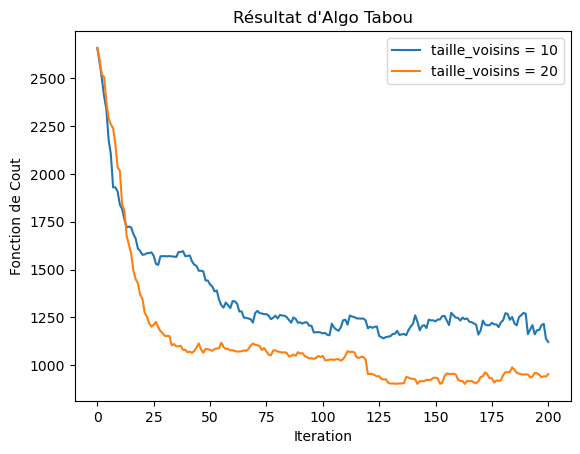

In [7]:
# Exemple d'utilisation
list_client_initial = [i for i in range(nombre_client)]
taille_tabou = 20
max_iterations = 200
taille_voisin = 10

meilleure_solution, meilleure_valeur , history_1 = tabou(list_client_initial, taille_tabou, max_iterations,10)
meilleure_solution, meilleure_valeur , history_2 = tabou(list_client_initial, taille_tabou, max_iterations,20)
 

 
plt.plot(history_1,label = 'taille_voisins = 10')
plt.plot(history_2,label = 'taille_voisins = 20')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Tabou")
plt.savefig('Résultats/Algo_taille_voisns_Tabou')

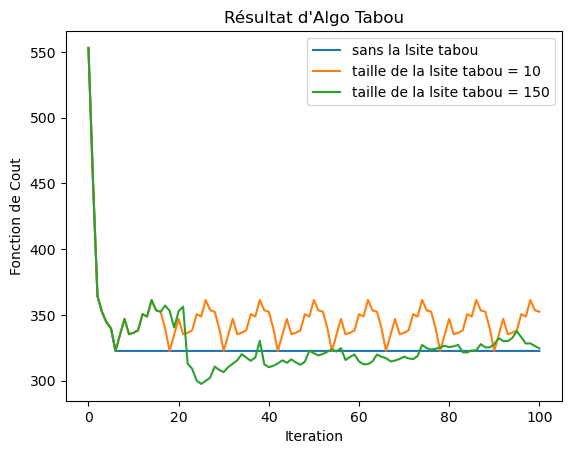

In [9]:
# Exemple d'utilisation
list_client_initial = [i for i in range(10)]

taille_tabou = 30
max_iterations =  100
taille_voisin = 200

 
random.shuffle(list_client_initial)

meilleure_solution, meilleure_valeur , history_1 = tabou(list_client_initial,0, max_iterations,taille_voisin)
meilleure_solution, meilleure_valeur , history_2 = tabou(list_client_initial,10, max_iterations,taille_voisin)
meilleure_solution, meilleure_valeur , history_3 = tabou(list_client_initial,400, max_iterations,taille_voisin)
 


plt.plot(history_1,label = 'sans la lsite tabou ')
plt.plot(history_2, label = 'taille de la lsite tabou = 10')
plt.plot(history_3,label = 'taille de la lsite tabou = 150')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Fonction de Cout')
plt.title("Résultat d'Algo Tabou")
plt.savefig('Résultats/Algo_taille_liste_Tabou')

In [27]:
def Voisinnage(T):
    n = len(T)
    i = np.random.randint(n)
    j = np.random.randint(n)
    T[j] = i
    T[i] = j
    return(T)

In [28]:
def recuit_simule(initial_state,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99):

    """Implémente l'algorithme de recuit simulé."""

    history = []
    current_state = initial_state
    current_energy = cout_fonction(code_to_X(current_state))
    best_state = current_state
    best_energy = current_energy
    temperature = temperature_initiale

    while temperature > temperature_finale:
        
        #V = Voisinnage(current_state)
        new_state =  Voisinnage(current_state)
        new_energy = cout_fonction(code_to_X(new_state))
        delta_energy = new_energy - current_energy

        if delta_energy < 0 or math.exp(-delta_energy / temperature) > random.random():
            current_state = new_state
            current_energy = new_energy

        if current_energy < best_energy:
            best_state = current_state
            best_energy = current_energy

        temperature *= alpha

        history.append(best_energy)

        print('best_energy : '  , best_energy)
        print('temperature : '  , temperature)
        print('new state : '  , current_state)


    return best_state, best_energy , history


In [30]:
code_I= [i for i in range(n)]
#S1,T = RS1(code_I,5,0.97,7)

In [32]:
best_state, best_energy , history = recuit_simule(code_I,  temperature_initiale=1.0, temperature_finale=1e-8, alpha=0.99)

best_energy :  824.7829255554811
temperature :  0.99
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 38, 32, 33, 34, 35, 36, 37, 31, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  824.7829255554811
temperature :  0.9801
new state :  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 23, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 10, 24, 25, 26, 27, 28, 29, 30, 38, 32, 33, 34, 35, 36, 37, 31, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  824.4042359622063
temperature :  0.9702989999999999
new state :  [0, 1, 2, 3, 27, 5, 6, 7, 8, 9, 23, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 10, 24, 25, 26, 4, 28, 29, 30, 38, 32, 33, 34, 35, 36, 37, 31, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
best_energy :  823.7518708871869
temperature :  0.96059601
new state :  [0, 1, 2, 3, 27, 24, 6, 7, 8, 9, 23, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 10, 5, 25, 26, 4, 28, 29, 30, 38, 32, 33, 34, 35, 36, 37

best_energy :  779.3241129947139
temperature :  0.7249803359578534
new state :  [0, 1, 2, 32, 22, 24, 34, 35, 48, 9, 21, 37, 12, 46, 19, 3, 16, 32, 38, 26, 38, 10, 4, 27, 5, 20, 19, 23, 4, 29, 30, 38, 3, 33, 6, 7, 49, 11, 20, 39, 44, 41, 42, 10, 40, 45, 35, 48, 47, 36]
best_energy :  779.3241129947139
temperature :  0.7177305325982748
new state :  [0, 1, 2, 32, 22, 24, 34, 35, 19, 9, 21, 37, 12, 46, 19, 3, 16, 32, 38, 8, 38, 10, 4, 27, 5, 20, 19, 23, 4, 29, 30, 38, 3, 33, 6, 7, 49, 11, 20, 39, 44, 41, 42, 10, 40, 45, 35, 48, 47, 36]
best_energy :  779.3241129947139
temperature :  0.7105532272722921
new state :  [0, 1, 2, 32, 22, 24, 34, 35, 19, 9, 21, 37, 12, 46, 19, 3, 16, 32, 38, 27, 38, 10, 4, 27, 5, 20, 19, 19, 4, 29, 30, 38, 3, 33, 6, 7, 49, 11, 20, 39, 44, 41, 42, 10, 40, 45, 35, 48, 47, 36]
best_energy :  778.0713591504106
temperature :  0.7034476949995692
new state :  [0, 1, 2, 32, 22, 24, 34, 35, 43, 9, 21, 37, 12, 46, 19, 3, 16, 32, 38, 27, 38, 10, 4, 27, 5, 20, 19, 19, 4, 29

best_energy :  778.0713591504106
temperature :  0.5309055429551132
new state :  [19, 39, 2, 20, 18, 26, 30, 14, 14, 9, 32, 39, 28, 46, 7, 22, 16, 32, 4, 0, 3, 44, 15, 39, 5, 31, 5, 44, 5, 29, 41, 31, 10, 33, 6, 7, 38, 28, 36, 11, 44, 5, 42, 26, 21, 45, 22, 26, 49, 48]
best_energy :  778.0713591504106
temperature :  0.525596487525562
new state :  [19, 39, 2, 20, 18, 26, 30, 14, 14, 9, 32, 39, 28, 46, 7, 22, 16, 32, 4, 0, 3, 44, 15, 39, 5, 31, 5, 44, 5, 29, 41, 31, 10, 35, 6, 33, 38, 28, 36, 11, 44, 5, 42, 26, 21, 45, 22, 26, 49, 48]
best_energy :  778.0713591504106
temperature :  0.5203405226503064
new state :  [19, 39, 2, 20, 18, 26, 30, 14, 14, 9, 32, 39, 28, 46, 7, 36, 16, 32, 4, 0, 3, 44, 15, 39, 5, 31, 5, 44, 5, 29, 41, 31, 10, 35, 6, 33, 15, 28, 36, 11, 44, 5, 42, 26, 21, 45, 22, 26, 49, 48]
best_energy :  778.0713591504106
temperature :  0.5151371174238033
new state :  [19, 39, 2, 20, 18, 26, 30, 14, 14, 9, 32, 39, 28, 46, 7, 36, 16, 32, 4, 0, 3, 44, 15, 39, 5, 31, 5, 44, 5, 29, 

best_energy :  778.0713591504106
temperature :  0.38878391807422696
new state :  [19, 46, 49, 11, 21, 26, 22, 41, 31, 9, 32, 3, 28, 29, 7, 48, 16, 33, 37, 0, 3, 4, 38, 40, 29, 31, 5, 34, 35, 13, 46, 46, 32, 3, 27, 28, 15, 18, 22, 30, 23, 7, 34, 38, 21, 30, 30, 26, 15, 2]
best_energy :  778.0713591504106
temperature :  0.3848960788934847
new state :  [19, 46, 49, 11, 21, 26, 22, 41, 31, 9, 32, 3, 28, 29, 7, 48, 16, 33, 37, 0, 3, 4, 30, 40, 29, 31, 5, 34, 35, 13, 22, 46, 32, 3, 27, 28, 15, 18, 22, 30, 23, 7, 34, 38, 21, 30, 30, 26, 15, 2]
best_energy :  778.0713591504106
temperature :  0.38104711810454983
new state :  [19, 46, 49, 11, 21, 26, 22, 41, 31, 9, 32, 3, 28, 29, 7, 48, 16, 30, 37, 0, 3, 4, 30, 40, 29, 31, 5, 34, 35, 13, 17, 46, 32, 3, 27, 28, 15, 18, 22, 30, 23, 7, 34, 38, 21, 30, 30, 26, 15, 2]
best_energy :  778.0713591504106
temperature :  0.37723664692350434
new state :  [19, 18, 49, 11, 21, 26, 22, 41, 31, 9, 32, 3, 28, 29, 7, 48, 16, 30, 1, 0, 3, 4, 30, 40, 29, 31, 5, 34,

best_energy :  778.0713591504106
temperature :  0.2847077732731954
new state :  [19, 18, 49, 4, 26, 21, 37, 7, 31, 27, 13, 3, 28, 49, 7, 48, 16, 33, 23, 37, 3, 5, 30, 18, 9, 31, 4, 9, 46, 19, 32, 46, 30, 17, 21, 28, 47, 19, 22, 30, 7, 7, 5, 27, 42, 26, 28, 36, 30, 13]
best_energy :  778.0713591504106
temperature :  0.28186069554046345
new state :  [19, 18, 49, 4, 26, 28, 37, 7, 31, 27, 13, 3, 28, 49, 7, 48, 16, 33, 23, 37, 3, 5, 30, 18, 9, 31, 4, 9, 5, 19, 32, 46, 30, 17, 21, 28, 47, 19, 22, 30, 7, 7, 5, 27, 42, 26, 28, 36, 30, 13]
best_energy :  778.0713591504106
temperature :  0.2790420885850588
new state :  [19, 18, 32, 4, 26, 28, 37, 7, 31, 27, 13, 3, 28, 49, 7, 48, 16, 33, 23, 37, 3, 5, 30, 18, 9, 31, 4, 9, 5, 19, 32, 46, 2, 17, 21, 28, 47, 19, 22, 30, 7, 7, 5, 27, 42, 26, 28, 36, 30, 13]
best_energy :  778.0713591504106
temperature :  0.2762516676992082
new state :  [19, 18, 32, 4, 26, 28, 37, 7, 45, 27, 13, 3, 28, 49, 7, 48, 16, 33, 23, 37, 3, 5, 30, 18, 9, 31, 4, 9, 5, 19, 32, 

best_energy :  754.3872177960873
temperature :  0.20849246173476127
new state :  [0, 24, 44, 4, 26, 48, 11, 7, 45, 13, 13, 6, 28, 29, 7, 27, 16, 33, 23, 37, 37, 32, 6, 46, 1, 31, 31, 33, 44, 13, 32, 26, 21, 27, 48, 28, 32, 20, 27, 46, 32, 7, 5, 27, 28, 8, 23, 36, 34, 11]
best_energy :  751.2254007903753
temperature :  0.20640753711741366
new state :  [0, 24, 44, 4, 26, 48, 11, 7, 37, 13, 13, 6, 28, 29, 7, 27, 16, 33, 23, 37, 37, 32, 6, 46, 1, 31, 31, 33, 44, 13, 32, 26, 21, 27, 48, 28, 32, 8, 27, 46, 32, 7, 5, 27, 28, 8, 23, 36, 34, 11]
best_energy :  751.2254007903753
temperature :  0.20434346174623952
new state :  [0, 24, 44, 4, 26, 48, 11, 7, 37, 13, 13, 6, 28, 29, 7, 27, 16, 33, 23, 37, 37, 32, 6, 46, 1, 31, 31, 33, 44, 13, 32, 26, 21, 27, 48, 28, 32, 8, 27, 40, 39, 7, 5, 27, 28, 8, 23, 36, 34, 11]
best_energy :  751.2254007903753
temperature :  0.20230002712877712
new state :  [0, 24, 44, 4, 26, 48, 11, 7, 37, 13, 13, 6, 28, 29, 7, 27, 16, 33, 20, 37, 18, 32, 6, 46, 1, 31, 31, 33,

best_energy :  751.2254007903753
temperature :  0.1526797322759062
new state :  [43, 29, 32, 48, 21, 48, 43, 7, 13, 28, 11, 10, 28, 24, 44, 16, 15, 43, 20, 37, 18, 4, 28, 48, 13, 33, 31, 33, 32, 1, 32, 26, 28, 25, 18, 28, 32, 28, 27, 13, 11, 7, 9, 0, 14, 8, 44, 36, 3, 11]
best_energy :  751.2254007903753
temperature :  0.15115293495314713
new state :  [43, 29, 32, 48, 21, 48, 43, 7, 13, 28, 11, 10, 28, 24, 44, 16, 15, 43, 39, 37, 18, 4, 28, 48, 13, 33, 31, 33, 32, 1, 32, 26, 28, 25, 18, 28, 32, 28, 27, 18, 11, 7, 9, 0, 14, 8, 44, 36, 3, 11]
best_energy :  751.2254007903753
temperature :  0.14964140560361566
new state :  [43, 29, 32, 48, 21, 48, 43, 7, 13, 28, 11, 10, 28, 24, 44, 16, 15, 43, 39, 37, 18, 4, 28, 30, 13, 33, 31, 33, 32, 1, 23, 26, 28, 25, 18, 28, 32, 28, 27, 18, 11, 7, 9, 0, 14, 8, 44, 36, 3, 11]
best_energy :  751.2254007903753
temperature :  0.1481449915475795
new state :  [43, 29, 13, 48, 21, 48, 43, 7, 13, 28, 11, 10, 28, 2, 44, 16, 15, 43, 39, 37, 18, 4, 28, 30, 13, 3

best_energy :  751.2254007903753
temperature :  0.1118078824235774
new state :  [43, 29, 35, 46, 12, 26, 24, 4, 13, 17, 5, 23, 4, 47, 44, 16, 15, 9, 42, 37, 18, 13, 29, 30, 6, 33, 30, 38, 44, 22, 23, 34, 12, 12, 31, 2, 4, 28, 5, 41, 11, 34, 18, 11, 28, 8, 23, 13, 18, 11]
best_energy :  751.2254007903753
temperature :  0.11068980359934164
new state :  [43, 29, 35, 46, 12, 26, 24, 4, 13, 17, 5, 23, 4, 47, 44, 16, 15, 9, 42, 37, 18, 13, 29, 30, 6, 41, 30, 38, 44, 22, 23, 34, 12, 12, 31, 2, 4, 28, 5, 41, 11, 25, 18, 11, 28, 8, 23, 13, 18, 11]
best_energy :  751.2254007903753
temperature :  0.10958290556334822
new state :  [43, 29, 35, 46, 12, 26, 24, 4, 13, 17, 5, 14, 4, 47, 11, 16, 15, 9, 42, 37, 18, 13, 29, 30, 6, 41, 30, 38, 44, 22, 23, 34, 12, 12, 31, 2, 4, 28, 5, 41, 11, 25, 18, 11, 28, 8, 23, 13, 18, 11]
best_energy :  751.2254007903753
temperature :  0.10848707650771475
new state :  [43, 29, 35, 46, 12, 26, 24, 4, 13, 17, 5, 14, 4, 47, 11, 16, 15, 9, 42, 37, 18, 13, 29, 30, 28, 41, 

best_energy :  751.2254007903753
temperature :  0.08270433237647315
new state :  [28, 18, 35, 46, 12, 37, 30, 4, 22, 26, 48, 44, 17, 47, 29, 18, 18, 12, 16, 19, 43, 20, 8, 30, 28, 41, 9, 38, 0, 14, 6, 19, 6, 12, 31, 14, 38, 5, 36, 48, 11, 25, 9, 20, 11, 8, 23, 13, 49, 48]
best_energy :  751.2254007903753
temperature :  0.08187728905270841
new state :  [28, 18, 35, 46, 12, 37, 30, 4, 22, 26, 48, 44, 17, 47, 29, 18, 18, 12, 16, 19, 43, 20, 8, 30, 36, 41, 9, 38, 0, 14, 6, 19, 6, 12, 31, 14, 24, 5, 36, 48, 11, 25, 9, 20, 11, 8, 23, 13, 49, 48]
best_energy :  751.2254007903753
temperature :  0.08105851616218133
new state :  [28, 18, 35, 46, 12, 37, 30, 4, 22, 26, 48, 44, 26, 47, 29, 18, 18, 12, 16, 19, 43, 20, 8, 30, 36, 41, 12, 38, 0, 14, 6, 19, 6, 12, 31, 14, 24, 5, 36, 48, 11, 25, 9, 20, 11, 8, 23, 13, 49, 48]
best_energy :  751.2254007903753
temperature :  0.08024793100055952
new state :  [28, 18, 35, 46, 12, 37, 30, 4, 22, 26, 48, 44, 26, 47, 29, 18, 18, 12, 16, 19, 43, 49, 8, 30, 36, 

best_energy :  751.2254007903753
temperature :  0.06056466128430856
new state :  [20, 18, 4, 21, 2, 9, 33, 4, 37, 5, 11, 10, 26, 26, 29, 18, 45, 12, 22, 36, 0, 3, 18, 30, 11, 41, 35, 3, 0, 14, 32, 32, 30, 4, 31, 26, 44, 42, 36, 48, 22, 25, 37, 20, 36, 16, 23, 44, 5, 21]
best_energy :  751.2254007903753
temperature :  0.05995901467146548
new state :  [20, 18, 4, 21, 2, 9, 33, 4, 37, 5, 11, 10, 45, 26, 29, 18, 45, 12, 22, 36, 0, 3, 18, 30, 11, 41, 35, 3, 0, 14, 32, 32, 30, 4, 31, 26, 44, 42, 36, 48, 22, 25, 37, 20, 36, 12, 23, 44, 5, 21]
best_energy :  751.2254007903753
temperature :  0.05935942452475082
new state :  [20, 21, 4, 21, 2, 9, 33, 4, 37, 5, 11, 10, 45, 26, 29, 18, 45, 12, 22, 36, 0, 1, 18, 30, 11, 41, 35, 3, 0, 14, 32, 32, 30, 4, 31, 26, 44, 42, 36, 48, 22, 25, 37, 20, 36, 12, 23, 44, 5, 21]
best_energy :  751.2254007903753
temperature :  0.058765830279503314
new state :  [20, 21, 4, 21, 2, 9, 33, 4, 27, 5, 11, 10, 45, 26, 29, 18, 45, 12, 22, 36, 0, 1, 18, 30, 11, 41, 35, 8, 

best_energy :  751.2254007903753
temperature :  0.04435170554047638
new state :  [20, 21, 44, 43, 8, 9, 48, 4, 4, 5, 11, 24, 44, 19, 17, 29, 28, 29, 30, 21, 46, 19, 18, 30, 49, 41, 35, 48, 49, 15, 18, 32, 44, 4, 31, 26, 28, 42, 21, 48, 22, 28, 24, 3, 2, 49, 20, 18, 27, 28]
best_energy :  751.2254007903753
temperature :  0.043908188485071616
new state :  [20, 21, 44, 43, 8, 9, 48, 4, 4, 5, 11, 24, 44, 19, 17, 29, 28, 29, 30, 21, 46, 19, 18, 30, 49, 41, 35, 37, 49, 15, 18, 32, 44, 4, 31, 26, 28, 27, 21, 48, 22, 28, 24, 3, 2, 49, 20, 18, 27, 28]
best_energy :  751.2254007903753
temperature :  0.0434691066002209
new state :  [20, 21, 44, 43, 8, 9, 48, 4, 4, 5, 11, 24, 44, 19, 17, 29, 28, 18, 17, 21, 46, 19, 18, 30, 49, 41, 35, 37, 49, 15, 18, 32, 44, 4, 31, 26, 28, 27, 21, 48, 22, 28, 24, 3, 2, 49, 20, 18, 27, 28]
best_energy :  751.2254007903753
temperature :  0.04303441553421869
new state :  [20, 21, 44, 43, 8, 9, 48, 4, 4, 5, 27, 24, 44, 19, 17, 29, 28, 18, 17, 21, 46, 19, 18, 30, 49, 4

best_energy :  751.2254007903753
temperature :  0.032478903417210436
new state :  [20, 21, 44, 5, 25, 3, 35, 36, 7, 5, 27, 6, 4, 28, 43, 37, 44, 18, 35, 48, 43, 32, 18, 30, 36, 4, 35, 10, 13, 15, 18, 7, 19, 4, 45, 6, 24, 43, 24, 7, 22, 28, 6, 37, 16, 34, 6, 18, 19, 13]
best_energy :  751.2254007903753
temperature :  0.032154114383038335
new state :  [20, 21, 44, 5, 25, 3, 35, 36, 7, 5, 39, 6, 4, 28, 43, 37, 44, 18, 35, 48, 43, 32, 18, 30, 36, 4, 35, 10, 13, 15, 18, 7, 19, 4, 45, 6, 24, 43, 24, 10, 22, 28, 6, 37, 16, 34, 6, 18, 19, 13]
best_energy :  751.2254007903753
temperature :  0.03183257323920795
new state :  [20, 21, 15, 5, 25, 3, 35, 36, 7, 5, 39, 6, 4, 28, 43, 2, 44, 18, 35, 48, 43, 32, 18, 30, 36, 4, 35, 10, 13, 15, 18, 7, 19, 4, 45, 6, 24, 43, 24, 10, 22, 28, 6, 37, 16, 34, 6, 18, 19, 13]
best_energy :  751.2254007903753
temperature :  0.03151424750681587
new state :  [20, 21, 15, 13, 25, 3, 35, 36, 7, 5, 39, 6, 4, 3, 43, 2, 44, 18, 35, 48, 43, 32, 18, 30, 36, 4, 35, 10, 13, 

best_energy :  751.2254007903753
temperature :  0.023784410415102923
new state :  [43, 38, 20, 28, 12, 3, 44, 36, 7, 45, 44, 43, 4, 29, 43, 2, 44, 48, 10, 48, 2, 32, 18, 30, 32, 40, 49, 24, 3, 13, 10, 3, 47, 4, 45, 6, 48, 18, 1, 44, 25, 28, 6, 0, 10, 9, 6, 32, 17, 26]
best_energy :  751.2254007903753
temperature :  0.023546566310951894
new state :  [43, 38, 20, 28, 12, 3, 44, 36, 7, 45, 44, 43, 4, 29, 43, 2, 44, 48, 10, 48, 2, 32, 47, 30, 32, 40, 49, 24, 3, 13, 10, 3, 47, 4, 45, 6, 48, 18, 1, 44, 25, 28, 6, 0, 10, 9, 6, 22, 17, 26]
best_energy :  751.2254007903753
temperature :  0.023311100647842375
new state :  [43, 38, 20, 28, 17, 3, 44, 36, 7, 45, 44, 43, 4, 29, 43, 2, 44, 4, 10, 48, 2, 32, 47, 30, 32, 40, 49, 24, 3, 13, 10, 3, 47, 4, 45, 6, 48, 18, 1, 44, 25, 28, 6, 0, 10, 9, 6, 22, 17, 26]
best_energy :  751.2254007903753
temperature :  0.02307798964136395
new state :  [43, 38, 20, 28, 17, 3, 44, 36, 7, 45, 44, 43, 38, 29, 43, 2, 44, 4, 10, 48, 2, 32, 47, 30, 32, 40, 49, 24, 3, 13

best_energy :  751.2254007903753
temperature :  0.01741740389222302
new state :  [15, 19, 20, 20, 40, 17, 33, 19, 7, 45, 29, 43, 25, 19, 43, 0, 44, 29, 36, 13, 3, 42, 28, 36, 40, 12, 46, 24, 7, 17, 47, 3, 36, 6, 45, 15, 18, 15, 12, 44, 4, 28, 21, 24, 36, 36, 26, 10, 17, 26]
best_energy :  751.2254007903753
temperature :  0.01724322985330079
new state :  [15, 19, 20, 20, 40, 17, 33, 19, 7, 45, 29, 43, 25, 19, 43, 0, 44, 29, 36, 13, 3, 42, 28, 36, 40, 12, 46, 24, 7, 17, 47, 3, 36, 6, 45, 40, 18, 15, 12, 44, 35, 28, 21, 24, 36, 36, 26, 10, 17, 26]
best_energy :  751.2254007903753
temperature :  0.017070797554767782
new state :  [15, 45, 20, 20, 40, 17, 33, 19, 7, 45, 29, 43, 25, 19, 43, 0, 44, 29, 36, 13, 3, 42, 28, 36, 40, 12, 46, 24, 7, 17, 47, 3, 36, 6, 45, 40, 18, 15, 12, 44, 35, 28, 21, 24, 36, 1, 26, 10, 17, 26]
best_energy :  751.2254007903753
temperature :  0.016900089579220106
new state :  [15, 45, 20, 20, 40, 17, 33, 19, 7, 45, 20, 43, 25, 19, 43, 0, 44, 29, 36, 13, 10, 42, 28, 

best_energy :  751.2254007903753
temperature :  0.012883660162531854
new state :  [15, 36, 19, 40, 19, 17, 33, 15, 38, 45, 10, 43, 48, 14, 13, 7, 29, 33, 30, 2, 10, 36, 28, 36, 40, 47, 46, 24, 36, 16, 18, 43, 36, 47, 15, 45, 28, 15, 8, 44, 36, 28, 26, 31, 18, 35, 26, 25, 12, 21]
best_energy :  751.2254007903753
temperature :  0.012754823560906535
new state :  [15, 36, 19, 40, 19, 17, 33, 15, 38, 45, 10, 43, 48, 14, 13, 7, 29, 5, 30, 2, 10, 36, 28, 36, 40, 47, 46, 24, 36, 16, 18, 43, 36, 47, 15, 45, 28, 15, 8, 44, 36, 28, 26, 31, 18, 35, 26, 25, 12, 21]
best_energy :  751.2254007903753
temperature :  0.01262727532529747
new state :  [15, 36, 19, 40, 19, 17, 33, 15, 38, 45, 10, 43, 23, 14, 13, 7, 29, 5, 30, 2, 10, 36, 28, 12, 40, 47, 46, 24, 36, 16, 18, 43, 36, 47, 15, 45, 28, 15, 8, 44, 36, 28, 26, 31, 18, 35, 26, 25, 12, 21]
best_energy :  751.2254007903753
temperature :  0.012501002572044496
new state :  [15, 36, 19, 40, 19, 17, 33, 15, 38, 45, 10, 43, 23, 14, 13, 7, 29, 5, 30, 2, 10,

best_energy :  751.2254007903753
temperature :  0.009530048232832525
new state :  [15, 16, 19, 31, 19, 17, 33, 42, 39, 25, 30, 43, 23, 46, 8, 11, 32, 5, 31, 2, 10, 43, 28, 12, 40, 9, 46, 38, 36, 47, 10, 3, 16, 32, 29, 45, 41, 15, 27, 8, 18, 36, 49, 21, 32, 35, 13, 29, 16, 42]
best_energy :  751.2254007903753
temperature :  0.009434747750504199
new state :  [15, 16, 19, 31, 19, 17, 33, 42, 39, 25, 30, 43, 23, 46, 8, 11, 32, 5, 31, 2, 10, 43, 28, 12, 40, 9, 46, 38, 36, 47, 10, 3, 16, 32, 29, 45, 41, 15, 27, 44, 18, 36, 49, 21, 39, 35, 13, 29, 16, 42]
best_energy :  751.2254007903753
temperature :  0.009340400272999157
new state :  [15, 16, 19, 31, 19, 17, 33, 42, 39, 25, 30, 43, 23, 46, 8, 36, 32, 5, 31, 2, 10, 43, 28, 12, 40, 9, 46, 38, 36, 47, 10, 3, 16, 32, 29, 45, 15, 15, 27, 44, 18, 36, 49, 21, 39, 35, 13, 29, 16, 42]
best_energy :  751.2254007903753
temperature :  0.009246996270269165
new state :  [15, 16, 19, 31, 36, 17, 33, 42, 39, 25, 30, 43, 23, 46, 8, 36, 32, 5, 31, 2, 10, 43,

best_energy :  751.2254007903753
temperature :  0.006978886433872193
new state :  [20, 16, 43, 40, 5, 8, 33, 42, 5, 18, 45, 21, 34, 46, 32, 35, 32, 47, 9, 49, 0, 11, 28, 12, 40, 47, 46, 38, 36, 40, 30, 45, 14, 32, 12, 15, 4, 10, 27, 44, 29, 36, 49, 2, 46, 10, 44, 25, 16, 19]
best_energy :  751.2254007903753
temperature :  0.006909097569533471
new state :  [20, 16, 43, 40, 5, 8, 33, 42, 5, 18, 45, 21, 34, 46, 32, 35, 32, 49, 9, 49, 0, 11, 28, 12, 40, 47, 46, 38, 36, 40, 30, 45, 14, 32, 12, 15, 4, 10, 27, 44, 29, 36, 49, 2, 46, 10, 44, 25, 16, 17]
best_energy :  751.2254007903753
temperature :  0.006840006593838137
new state :  [29, 16, 43, 40, 5, 8, 33, 42, 5, 18, 45, 21, 34, 46, 32, 35, 32, 49, 9, 49, 0, 11, 28, 12, 40, 47, 46, 38, 36, 0, 30, 45, 14, 32, 12, 15, 4, 10, 27, 44, 29, 36, 49, 2, 46, 10, 44, 25, 16, 17]
best_energy :  751.2254007903753
temperature :  0.0067716065278997555
new state :  [29, 16, 43, 40, 5, 8, 33, 42, 5, 18, 45, 21, 34, 46, 32, 35, 32, 32, 9, 49, 0, 11, 28, 12

best_energy :  751.2254007903753
temperature :  0.005110662051959969
new state :  [11, 21, 22, 26, 27, 15, 33, 42, 27, 18, 11, 0, 31, 28, 45, 5, 18, 8, 16, 49, 37, 1, 2, 45, 11, 47, 35, 4, 13, 47, 30, 12, 16, 32, 12, 26, 27, 26, 27, 44, 11, 36, 27, 2, 22, 14, 44, 29, 16, 17]
best_energy :  751.2254007903753
temperature :  0.005059555431440369
new state :  [11, 21, 22, 26, 27, 15, 33, 42, 27, 18, 11, 0, 31, 28, 45, 5, 18, 8, 16, 49, 47, 1, 2, 45, 11, 47, 35, 4, 13, 47, 30, 12, 16, 32, 12, 26, 27, 26, 27, 44, 11, 36, 27, 2, 22, 14, 44, 20, 16, 17]
best_energy :  751.2254007903753
temperature :  0.005008959877125965
new state :  [38, 21, 22, 26, 27, 15, 33, 42, 27, 18, 11, 0, 31, 28, 45, 5, 18, 8, 16, 49, 47, 1, 2, 45, 11, 47, 35, 4, 13, 47, 30, 12, 16, 32, 12, 26, 27, 26, 0, 44, 11, 36, 27, 2, 22, 14, 44, 20, 16, 17]
best_energy :  751.2254007903753
temperature :  0.004958870278354705
new state :  [38, 21, 22, 26, 27, 15, 33, 42, 27, 18, 11, 0, 31, 28, 45, 5, 18, 8, 16, 49, 20, 1, 2, 45,

best_energy :  751.2254007903753
temperature :  0.0037425550418151415
new state :  [38, 34, 28, 26, 21, 18, 13, 42, 27, 15, 13, 17, 31, 36, 45, 9, 32, 20, 5, 49, 17, 28, 2, 45, 34, 47, 2, 37, 21, 35, 30, 12, 16, 37, 24, 39, 13, 27, 36, 35, 11, 36, 27, 33, 22, 4, 44, 20, 11, 17]
best_energy :  751.2254007903753
temperature :  0.00370512949139699
new state :  [38, 34, 28, 22, 21, 18, 13, 42, 27, 15, 13, 17, 31, 36, 45, 9, 32, 20, 5, 49, 17, 28, 3, 45, 34, 47, 2, 37, 21, 35, 30, 12, 16, 37, 24, 39, 13, 27, 36, 35, 11, 36, 27, 33, 22, 4, 44, 20, 11, 17]
best_energy :  751.2254007903753
temperature :  0.0036680781964830204
new state :  [38, 34, 28, 22, 21, 18, 13, 42, 27, 15, 13, 17, 31, 36, 45, 9, 32, 20, 5, 49, 17, 28, 3, 45, 34, 47, 34, 37, 21, 35, 30, 12, 16, 37, 26, 39, 13, 27, 36, 35, 11, 36, 27, 33, 22, 4, 44, 20, 11, 17]
best_energy :  751.2254007903753
temperature :  0.00363139741451819
new state :  [38, 34, 28, 22, 21, 36, 13, 42, 27, 15, 13, 17, 31, 36, 45, 9, 32, 20, 5, 49, 17, 

best_energy :  751.2254007903753
temperature :  0.0027683693618568506
new state :  [36, 27, 10, 22, 21, 43, 49, 22, 27, 15, 2, 17, 31, 28, 18, 26, 32, 36, 48, 49, 38, 0, 40, 32, 34, 47, 48, 1, 13, 5, 30, 12, 23, 46, 26, 39, 17, 27, 20, 36, 22, 36, 27, 5, 22, 4, 43, 6, 26, 6]
best_energy :  751.2254007903753
temperature :  0.002740685668238282
new state :  [36, 27, 10, 22, 21, 43, 49, 22, 27, 15, 2, 17, 31, 28, 18, 26, 32, 36, 48, 49, 38, 0, 40, 32, 34, 47, 48, 1, 13, 5, 30, 12, 23, 46, 49, 39, 17, 27, 20, 36, 22, 36, 27, 5, 22, 4, 43, 6, 26, 34]
best_energy :  751.2254007903753
temperature :  0.0027132788115558993
new state :  [36, 27, 40, 22, 21, 43, 49, 22, 27, 15, 2, 17, 31, 28, 18, 26, 32, 36, 48, 49, 38, 0, 40, 32, 34, 47, 48, 1, 13, 5, 30, 12, 23, 46, 49, 39, 17, 27, 20, 36, 2, 36, 27, 5, 22, 4, 43, 6, 26, 34]
best_energy :  751.2254007903753
temperature :  0.0026861460234403403
new state :  [36, 27, 40, 22, 21, 43, 49, 22, 27, 15, 2, 17, 31, 28, 18, 26, 32, 36, 48, 49, 38, 0, 40

best_energy :  751.2254007903753
temperature :  0.0020272862121357657
new state :  [48, 12, 12, 2, 21, 22, 49, 14, 19, 15, 36, 17, 1, 32, 45, 26, 43, 31, 48, 48, 31, 44, 24, 24, 22, 47, 48, 1, 13, 34, 7, 20, 13, 1, 29, 39, 10, 27, 20, 35, 2, 36, 30, 16, 21, 14, 20, 12, 19, 34]
best_energy :  751.2254007903753
temperature :  0.002007013350014408
new state :  [48, 12, 32, 2, 21, 22, 49, 14, 19, 15, 36, 17, 1, 32, 45, 26, 43, 31, 48, 48, 31, 44, 24, 24, 22, 47, 48, 1, 13, 34, 7, 20, 2, 1, 29, 39, 10, 27, 20, 35, 2, 36, 30, 16, 21, 14, 20, 12, 19, 34]
best_energy :  751.2254007903753
temperature :  0.0019869432165142637
new state :  [48, 12, 32, 2, 21, 22, 49, 14, 19, 15, 28, 17, 1, 32, 45, 26, 43, 31, 48, 48, 31, 44, 24, 24, 22, 47, 48, 1, 10, 34, 7, 20, 2, 1, 29, 39, 10, 27, 20, 35, 2, 36, 30, 16, 21, 14, 20, 12, 19, 34]
best_energy :  751.2254007903753
temperature :  0.001967073784349121
new state :  [48, 12, 32, 2, 21, 22, 49, 14, 19, 38, 28, 17, 1, 32, 45, 26, 43, 31, 48, 48, 31, 44, 

best_energy :  751.2254007903753
temperature :  0.001484588524400921
new state :  [16, 12, 12, 15, 36, 22, 49, 40, 46, 15, 28, 17, 2, 21, 38, 31, 0, 43, 38, 47, 31, 13, 24, 24, 35, 24, 25, 18, 10, 2, 7, 15, 2, 13, 2, 24, 37, 36, 14, 35, 7, 43, 7, 41, 21, 49, 8, 19, 19, 45]
best_energy :  751.2254007903753
temperature :  0.0014697426391569117
new state :  [9, 12, 12, 15, 36, 22, 49, 40, 46, 0, 28, 17, 2, 21, 38, 31, 0, 43, 38, 47, 31, 13, 24, 24, 35, 24, 25, 18, 10, 2, 7, 15, 2, 13, 2, 24, 37, 36, 14, 35, 7, 43, 7, 41, 21, 49, 8, 19, 19, 45]
best_energy :  751.2254007903753
temperature :  0.0014550452127653425
new state :  [9, 12, 12, 15, 36, 22, 49, 40, 46, 0, 46, 17, 2, 21, 38, 31, 0, 43, 38, 47, 31, 13, 24, 24, 35, 24, 25, 18, 10, 2, 7, 15, 2, 13, 2, 24, 37, 36, 14, 35, 7, 43, 7, 41, 21, 49, 10, 19, 19, 45]
best_energy :  751.2254007903753
temperature :  0.0014404947606376892
new state :  [9, 12, 12, 15, 36, 22, 49, 14, 46, 0, 46, 17, 2, 21, 7, 31, 0, 43, 38, 47, 31, 13, 24, 24, 35, 

best_energy :  751.2254007903753
temperature :  0.0010981506858273175
new state :  [16, 12, 8, 10, 36, 34, 31, 43, 2, 28, 3, 17, 2, 44, 7, 45, 0, 43, 38, 47, 31, 13, 29, 24, 35, 24, 10, 18, 9, 22, 43, 6, 2, 45, 41, 28, 37, 44, 14, 35, 42, 34, 40, 30, 37, 33, 10, 9, 19, 22]
best_energy :  751.2254007903753
temperature :  0.0010871691789690443
new state :  [16, 12, 8, 10, 36, 34, 31, 43, 2, 28, 3, 17, 2, 44, 7, 45, 0, 43, 38, 47, 31, 13, 29, 24, 35, 24, 10, 18, 9, 22, 43, 6, 40, 45, 41, 28, 37, 44, 14, 35, 32, 34, 40, 30, 37, 33, 10, 9, 19, 22]
best_energy :  751.2254007903753
temperature :  0.0010762974871793539
new state :  [16, 39, 8, 10, 36, 34, 31, 43, 2, 28, 3, 17, 2, 44, 7, 45, 0, 43, 38, 47, 31, 13, 29, 24, 35, 24, 10, 18, 9, 22, 43, 6, 40, 45, 41, 28, 37, 44, 14, 1, 32, 34, 40, 30, 37, 33, 10, 9, 19, 22]
best_energy :  751.2254007903753
temperature :  0.0010655345123075602
new state :  [16, 39, 8, 10, 36, 37, 31, 43, 2, 28, 3, 17, 2, 44, 7, 45, 0, 43, 38, 47, 31, 13, 29, 24, 35,

best_energy :  751.2254007903753
temperature :  0.0008123024723430627
new state :  [37, 27, 2, 39, 14, 37, 31, 43, 35, 43, 3, 17, 49, 12, 39, 45, 31, 41, 38, 23, 31, 13, 29, 34, 29, 14, 10, 1, 9, 24, 43, 16, 40, 33, 23, 8, 41, 24, 33, 14, 32, 36, 40, 9, 23, 33, 35, 41, 19, 12]
best_energy :  751.2254007903753
temperature :  0.000804179447619632
new state :  [37, 27, 2, 39, 14, 37, 19, 43, 35, 43, 3, 17, 49, 12, 39, 45, 31, 41, 38, 6, 31, 13, 29, 34, 29, 14, 10, 1, 9, 24, 43, 16, 40, 33, 23, 8, 41, 24, 33, 14, 32, 36, 40, 9, 23, 33, 35, 41, 19, 12]
best_energy :  751.2254007903753
temperature :  0.0007961376531434358
new state :  [37, 27, 2, 39, 14, 37, 19, 43, 35, 43, 3, 17, 49, 12, 39, 45, 31, 41, 38, 6, 31, 13, 29, 34, 29, 14, 10, 1, 9, 24, 43, 16, 40, 33, 23, 8, 41, 24, 46, 14, 32, 36, 40, 9, 23, 33, 38, 41, 19, 12]
best_energy :  751.2254007903753
temperature :  0.0007881762766120013
new state :  [37, 27, 2, 39, 14, 37, 19, 43, 35, 48, 3, 17, 49, 12, 39, 45, 31, 41, 38, 6, 31, 13, 

best_energy :  751.2254007903753
temperature :  0.0006008604420963866
new state :  [37, 36, 48, 37, 18, 49, 19, 40, 35, 38, 3, 17, 4, 12, 30, 25, 29, 15, 38, 6, 5, 13, 43, 34, 29, 33, 10, 35, 16, 16, 14, 47, 40, 25, 23, 35, 1, 3, 18, 14, 7, 36, 40, 22, 18, 33, 35, 31, 2, 5]
best_energy :  751.2254007903753
temperature :  0.0005948518376754227
new state :  [37, 36, 48, 43, 18, 49, 19, 40, 35, 38, 3, 17, 4, 12, 30, 25, 29, 15, 38, 6, 5, 13, 43, 34, 29, 33, 10, 35, 16, 16, 14, 47, 40, 25, 23, 35, 1, 3, 18, 14, 7, 36, 40, 3, 18, 33, 35, 31, 2, 5]
best_energy :  751.2254007903753
temperature :  0.0005889033192986684
new state :  [37, 36, 48, 43, 18, 49, 19, 40, 35, 38, 3, 17, 4, 12, 30, 25, 29, 15, 38, 6, 5, 13, 43, 34, 29, 33, 10, 35, 42, 16, 14, 47, 40, 25, 23, 35, 1, 3, 18, 14, 7, 36, 28, 3, 18, 33, 35, 31, 2, 5]
best_energy :  751.2254007903753
temperature :  0.0005830142861056818
new state :  [37, 36, 48, 43, 18, 49, 19, 40, 35, 38, 3, 17, 4, 12, 30, 25, 29, 15, 24, 6, 5, 13, 43, 34, 1

best_energy :  751.2254007903753
temperature :  0.00044001212643921455
new state :  [41, 36, 32, 10, 35, 49, 47, 48, 35, 26, 3, 44, 21, 29, 6, 39, 20, 43, 21, 6, 16, 12, 43, 34, 18, 33, 13, 35, 42, 13, 14, 38, 2, 14, 6, 42, 47, 46, 48, 15, 7, 0, 35, 17, 6, 33, 10, 6, 38, 5]
best_energy :  751.2254007903753
temperature :  0.0004356120051748224
new state :  [41, 36, 32, 10, 35, 49, 47, 48, 35, 26, 3, 44, 21, 29, 6, 39, 20, 43, 21, 6, 16, 12, 43, 34, 18, 33, 13, 35, 42, 13, 14, 38, 2, 14, 6, 46, 47, 46, 48, 15, 7, 0, 35, 17, 6, 33, 35, 6, 38, 5]
best_energy :  751.2254007903753
temperature :  0.0004312558851230742
new state :  [41, 36, 32, 10, 35, 49, 47, 48, 35, 26, 3, 44, 21, 29, 6, 39, 32, 43, 21, 6, 16, 12, 43, 34, 18, 33, 13, 35, 42, 13, 14, 38, 16, 14, 6, 46, 47, 46, 48, 15, 7, 0, 35, 17, 6, 33, 35, 6, 38, 5]
best_energy :  751.2254007903753
temperature :  0.00042694332627184347
new state :  [41, 36, 32, 10, 35, 49, 47, 48, 35, 26, 3, 44, 21, 29, 6, 39, 32, 43, 24, 6, 16, 12, 43, 34

best_energy :  751.2254007903753
temperature :  0.00032222236288023367
new state :  [42, 36, 24, 39, 6, 49, 4, 14, 11, 22, 3, 8, 21, 20, 7, 39, 32, 43, 42, 48, 13, 40, 9, 34, 2, 31, 38, 35, 43, 13, 14, 25, 16, 14, 28, 36, 35, 46, 26, 41, 21, 39, 18, 28, 44, 49, 35, 25, 19, 45]
best_energy :  751.2254007903753
temperature :  0.00031900013925143135
new state :  [42, 36, 24, 39, 6, 49, 4, 14, 11, 22, 3, 8, 21, 20, 7, 39, 32, 43, 42, 48, 13, 40, 9, 34, 2, 31, 38, 35, 43, 13, 31, 30, 16, 14, 28, 36, 35, 46, 26, 41, 21, 39, 18, 28, 44, 49, 35, 25, 19, 45]
best_energy :  751.2254007903753
temperature :  0.000315810137858917
new state :  [42, 36, 24, 39, 6, 49, 4, 14, 41, 22, 3, 8, 21, 20, 7, 39, 32, 43, 42, 48, 13, 40, 9, 34, 2, 31, 38, 35, 43, 13, 31, 30, 16, 14, 28, 36, 35, 46, 26, 41, 21, 8, 18, 28, 44, 49, 35, 25, 19, 45]
best_energy :  751.2254007903753
temperature :  0.00031265203648032783
new state :  [6, 36, 24, 39, 6, 49, 0, 14, 41, 22, 3, 8, 21, 20, 7, 39, 32, 43, 42, 48, 13, 40, 9,

best_energy :  751.2254007903753
temperature :  0.00023834800213656286
new state :  [6, 29, 24, 29, 6, 49, 28, 41, 41, 22, 3, 25, 49, 45, 43, 17, 32, 15, 44, 48, 22, 29, 20, 15, 2, 11, 32, 35, 6, 3, 31, 30, 26, 39, 38, 36, 35, 46, 34, 33, 44, 3, 1, 14, 40, 13, 35, 32, 21, 12]
best_energy :  751.2254007903753
temperature :  0.00023596452211519723
new state :  [6, 29, 24, 29, 6, 49, 28, 41, 41, 22, 3, 25, 49, 45, 43, 17, 32, 15, 44, 48, 22, 29, 47, 15, 2, 11, 32, 35, 6, 3, 31, 30, 26, 39, 38, 36, 35, 46, 34, 33, 44, 3, 1, 14, 40, 13, 35, 22, 21, 12]
best_energy :  751.2254007903753
temperature :  0.00023360487689404527
new state :  [6, 29, 24, 29, 6, 49, 28, 41, 41, 22, 3, 25, 49, 45, 43, 17, 32, 15, 44, 48, 22, 29, 47, 36, 2, 11, 32, 35, 6, 3, 31, 30, 26, 39, 38, 36, 23, 46, 34, 33, 44, 3, 1, 14, 40, 13, 35, 22, 21, 12]
best_energy :  751.2254007903753
temperature :  0.0002312688281251048
new state :  [6, 29, 24, 29, 6, 49, 28, 41, 41, 22, 3, 25, 49, 45, 43, 17, 32, 15, 44, 48, 22, 29, 

best_energy :  751.2254007903753
temperature :  0.00017630610617676613
new state :  [38, 21, 22, 47, 47, 24, 28, 39, 23, 22, 3, 25, 49, 25, 24, 31, 34, 19, 44, 17, 22, 1, 2, 43, 33, 13, 32, 44, 32, 15, 47, 15, 28, 24, 16, 36, 23, 46, 0, 7, 30, 43, 1, 41, 27, 31, 35, 4, 33, 12]
best_energy :  751.2254007903753
temperature :  0.00017454304511499847
new state :  [38, 21, 22, 47, 47, 20, 28, 39, 23, 22, 3, 25, 49, 25, 24, 31, 34, 19, 44, 17, 5, 1, 2, 43, 33, 13, 32, 44, 32, 15, 47, 15, 28, 24, 16, 36, 23, 46, 0, 7, 30, 43, 1, 41, 27, 31, 35, 4, 33, 12]
best_energy :  751.2254007903753
temperature :  0.0001727976146638485
new state :  [38, 21, 22, 47, 47, 20, 28, 39, 23, 22, 3, 25, 49, 25, 24, 31, 38, 19, 44, 17, 5, 1, 2, 43, 33, 13, 32, 44, 32, 15, 47, 15, 28, 24, 16, 36, 23, 46, 16, 7, 30, 43, 1, 41, 27, 31, 35, 4, 33, 12]
best_energy :  751.2254007903753
temperature :  0.00017106963851721
new state :  [38, 21, 22, 47, 47, 20, 28, 39, 23, 22, 3, 25, 49, 31, 24, 31, 38, 19, 44, 17, 5, 1, 2

best_energy :  751.2254007903753
temperature :  0.00012910955564389182
new state :  [10, 48, 34, 36, 43, 23, 28, 39, 24, 22, 0, 47, 20, 31, 45, 31, 30, 19, 45, 27, 42, 1, 27, 46, 8, 13, 32, 22, 20, 23, 16, 13, 28, 23, 2, 3, 3, 3, 16, 7, 8, 43, 20, 5, 27, 18, 23, 11, 1, 12]
best_energy :  751.2254007903753
temperature :  0.0001278184600874529
new state :  [10, 48, 34, 36, 11, 23, 28, 39, 24, 22, 0, 4, 20, 31, 45, 31, 30, 19, 45, 27, 42, 1, 27, 46, 8, 13, 32, 22, 20, 23, 16, 13, 28, 23, 2, 3, 3, 3, 16, 7, 8, 43, 20, 5, 27, 18, 23, 11, 1, 12]
best_energy :  751.2254007903753
temperature :  0.00012654027548657836
new state :  [10, 48, 34, 36, 11, 23, 28, 39, 24, 22, 0, 4, 20, 31, 45, 31, 30, 19, 45, 27, 42, 1, 27, 46, 8, 13, 32, 22, 20, 23, 16, 13, 28, 23, 2, 3, 3, 3, 16, 7, 8, 43, 20, 5, 27, 18, 23, 11, 1, 12]
best_energy :  751.2254007903753
temperature :  0.0001252748727317126
new state :  [10, 48, 34, 36, 11, 23, 28, 39, 24, 22, 0, 4, 20, 31, 45, 31, 30, 19, 45, 27, 42, 1, 27, 46, 8, 1

best_energy :  751.2254007903753
temperature :  9.55023865177817e-05
new state :  [32, 20, 45, 0, 11, 0, 16, 39, 14, 22, 41, 4, 16, 20, 8, 2, 12, 19, 45, 27, 13, 13, 49, 46, 8, 48, 32, 48, 12, 23, 36, 39, 0, 23, 42, 39, 30, 3, 41, 49, 48, 38, 34, 5, 27, 2, 23, 11, 40, 39]
best_energy :  751.2254007903753
temperature :  9.454736265260388e-05
new state :  [32, 20, 45, 0, 11, 0, 16, 39, 14, 22, 41, 4, 16, 20, 8, 2, 12, 19, 45, 27, 13, 13, 49, 46, 8, 48, 32, 35, 12, 23, 36, 39, 0, 23, 42, 27, 30, 3, 41, 49, 48, 38, 34, 5, 27, 2, 23, 11, 40, 39]
best_energy :  751.2254007903753
temperature :  9.360188902607784e-05
new state :  [32, 20, 45, 0, 11, 0, 16, 39, 14, 22, 41, 4, 16, 20, 8, 24, 12, 19, 45, 27, 13, 13, 49, 46, 15, 48, 32, 35, 12, 23, 36, 39, 0, 23, 42, 27, 30, 3, 41, 49, 48, 38, 34, 5, 27, 2, 23, 11, 40, 39]
best_energy :  751.2254007903753
temperature :  9.266587013581706e-05
new state :  [32, 20, 45, 0, 11, 0, 16, 39, 14, 22, 41, 4, 16, 20, 8, 24, 12, 19, 45, 27, 13, 13, 49, 46, 1

best_energy :  751.2254007903753
temperature :  7.064315096667493e-05
new state :  [22, 20, 16, 8, 26, 27, 16, 21, 3, 3, 41, 4, 16, 14, 13, 45, 2, 30, 31, 27, 1, 7, 0, 8, 15, 35, 4, 5, 23, 13, 17, 18, 0, 23, 27, 25, 30, 3, 41, 49, 48, 42, 41, 3, 27, 15, 35, 41, 3, 39]
best_energy :  751.2254007903753
temperature :  6.993671945700819e-05
new state :  [22, 20, 16, 8, 26, 27, 16, 21, 3, 3, 41, 4, 16, 14, 13, 45, 2, 30, 31, 27, 1, 7, 0, 8, 15, 35, 4, 5, 23, 13, 17, 18, 0, 23, 27, 25, 30, 3, 41, 49, 48, 38, 41, 3, 27, 15, 35, 41, 3, 39]
best_energy :  751.2254007903753
temperature :  6.92373522624381e-05
new state :  [22, 20, 16, 8, 26, 27, 16, 21, 3, 3, 41, 4, 16, 14, 13, 45, 2, 30, 37, 27, 1, 7, 0, 8, 15, 35, 4, 5, 23, 13, 17, 18, 0, 23, 27, 25, 30, 18, 41, 49, 48, 38, 41, 3, 27, 15, 35, 41, 3, 39]
best_energy :  751.2254007903753
temperature :  6.854497873981372e-05
new state :  [22, 20, 16, 8, 26, 27, 16, 21, 3, 3, 41, 4, 16, 14, 13, 45, 2, 30, 37, 27, 1, 7, 0, 8, 15, 35, 4, 5, 23, 13, 

best_energy :  751.2254007903753
temperature :  5.1214895320941356e-05
new state :  [22, 20, 42, 16, 7, 43, 25, 41, 29, 17, 41, 30, 27, 14, 13, 45, 45, 9, 48, 11, 1, 9, 47, 31, 38, 6, 32, 12, 23, 8, 11, 23, 26, 23, 22, 25, 11, 18, 24, 49, 48, 7, 2, 5, 27, 16, 45, 22, 18, 39]
best_energy :  751.2254007903753
temperature :  5.0702746367731945e-05
new state :  [22, 20, 42, 16, 7, 43, 25, 41, 29, 17, 41, 30, 27, 14, 13, 45, 45, 9, 48, 11, 1, 28, 47, 31, 38, 6, 32, 12, 21, 8, 11, 23, 26, 23, 22, 25, 11, 18, 24, 49, 48, 7, 2, 5, 27, 16, 45, 22, 18, 39]
best_energy :  751.2254007903753
temperature :  5.019571890405462e-05
new state :  [22, 20, 42, 16, 7, 43, 25, 41, 29, 17, 41, 30, 27, 14, 13, 45, 45, 9, 48, 11, 1, 28, 47, 31, 38, 6, 32, 12, 21, 8, 11, 23, 26, 23, 22, 25, 49, 18, 24, 49, 48, 7, 2, 5, 27, 16, 45, 22, 18, 36]
best_energy :  751.2254007903753
temperature :  4.9693761715014075e-05
new state :  [45, 20, 42, 16, 7, 43, 25, 41, 29, 17, 41, 30, 27, 14, 13, 45, 45, 9, 48, 11, 1, 28, 4

best_energy :  751.2254007903753
temperature :  3.788367719194202e-05
new state :  [47, 20, 13, 16, 22, 43, 13, 41, 41, 2, 19, 30, 33, 2, 4, 30, 26, 43, 48, 10, 1, 25, 4, 37, 39, 37, 16, 12, 30, 47, 28, 38, 26, 12, 22, 25, 49, 25, 39, 24, 48, 8, 2, 17, 27, 22, 45, 0, 40, 13]
best_energy :  751.2254007903753
temperature :  3.7504840420022595e-05
new state :  [47, 20, 13, 16, 22, 43, 13, 41, 41, 2, 19, 30, 33, 2, 16, 30, 14, 43, 48, 10, 1, 25, 4, 37, 39, 37, 16, 12, 30, 47, 28, 38, 26, 12, 22, 25, 49, 25, 39, 24, 48, 8, 2, 17, 27, 22, 45, 0, 40, 13]
best_energy :  751.2254007903753
temperature :  3.712979201582237e-05
new state :  [47, 20, 13, 16, 22, 43, 13, 41, 41, 2, 19, 30, 33, 2, 16, 30, 14, 43, 22, 10, 1, 25, 18, 37, 39, 37, 16, 12, 30, 47, 28, 38, 26, 12, 22, 25, 49, 25, 39, 24, 48, 8, 2, 17, 27, 22, 45, 0, 40, 13]
best_energy :  751.2254007903753
temperature :  3.6758494095664146e-05
new state :  [47, 20, 13, 16, 22, 43, 13, 41, 41, 2, 19, 30, 33, 2, 16, 30, 14, 43, 22, 10, 1, 25

best_energy :  751.2254007903753
temperature :  2.7742344462558588e-05
new state :  [47, 29, 13, 16, 22, 45, 45, 41, 45, 2, 16, 30, 34, 37, 16, 29, 41, 45, 48, 35, 1, 25, 18, 13, 39, 34, 16, 32, 30, 1, 8, 10, 27, 43, 12, 19, 15, 13, 39, 24, 5, 16, 2, 33, 27, 5, 37, 0, 18, 13]
best_energy :  751.2254007903753
temperature :  2.7464921017933e-05
new state :  [47, 29, 13, 16, 22, 45, 45, 41, 45, 2, 16, 30, 34, 37, 16, 29, 41, 20, 48, 35, 17, 25, 18, 13, 39, 34, 16, 32, 30, 1, 8, 10, 27, 43, 12, 19, 15, 13, 39, 24, 5, 16, 2, 33, 27, 5, 37, 0, 18, 13]
best_energy :  751.2254007903753
temperature :  2.719027180775367e-05
new state :  [47, 29, 13, 16, 22, 45, 45, 41, 45, 2, 16, 30, 34, 37, 16, 29, 41, 20, 48, 35, 17, 25, 18, 13, 31, 34, 16, 32, 30, 1, 8, 24, 27, 43, 12, 19, 15, 13, 39, 24, 5, 16, 2, 33, 27, 5, 37, 0, 18, 13]
best_energy :  751.2254007903753
temperature :  2.6918369089676135e-05
new state :  [30, 29, 13, 16, 22, 45, 45, 41, 45, 2, 16, 30, 34, 37, 16, 29, 41, 20, 48, 35, 17, 25,

best_energy :  751.2254007903753
temperature :  2.052102255762088e-05
new state :  [30, 25, 38, 24, 22, 24, 45, 41, 10, 2, 28, 30, 42, 37, 16, 28, 47, 25, 48, 15, 17, 44, 24, 13, 48, 17, 16, 32, 15, 47, 15, 37, 27, 44, 39, 16, 36, 31, 2, 34, 5, 16, 46, 33, 21, 5, 42, 16, 24, 13]
best_energy :  751.2254007903753
temperature :  2.031581233204467e-05
new state :  [30, 25, 38, 24, 22, 24, 45, 41, 10, 2, 28, 30, 42, 37, 16, 28, 47, 22, 48, 15, 17, 44, 17, 13, 48, 17, 16, 32, 15, 47, 15, 37, 27, 44, 39, 16, 36, 31, 2, 34, 5, 16, 46, 33, 21, 5, 42, 16, 24, 13]
best_energy :  751.2254007903753
temperature :  2.011265420872422e-05
new state :  [30, 25, 38, 24, 22, 24, 45, 41, 10, 2, 28, 30, 42, 37, 36, 28, 47, 22, 48, 15, 17, 44, 17, 13, 48, 17, 16, 32, 15, 47, 15, 37, 27, 44, 39, 16, 14, 31, 2, 34, 5, 16, 46, 33, 21, 5, 42, 16, 24, 13]
best_energy :  751.2254007903753
temperature :  1.9911527666636977e-05
new state :  [30, 25, 38, 24, 22, 24, 45, 41, 10, 2, 28, 30, 42, 37, 36, 28, 47, 22, 48, 

best_energy :  751.2254007903753
temperature :  1.5179408048181485e-05
new state :  [2, 36, 21, 41, 43, 24, 45, 41, 28, 33, 23, 30, 42, 40, 3, 38, 47, 22, 19, 18, 17, 2, 2, 10, 38, 17, 16, 36, 8, 47, 19, 37, 15, 9, 13, 43, 27, 45, 15, 42, 22, 3, 39, 4, 21, 37, 42, 10, 24, 13]
best_energy :  751.2254007903753
temperature :  1.5027613967699669e-05
new state :  [2, 36, 21, 41, 43, 24, 45, 41, 28, 33, 23, 30, 42, 40, 3, 38, 47, 22, 19, 18, 17, 2, 2, 10, 37, 17, 16, 36, 8, 47, 19, 37, 15, 9, 13, 43, 27, 24, 15, 42, 22, 3, 39, 4, 21, 37, 42, 10, 24, 13]
best_energy :  751.2254007903753
temperature :  1.4877337828022672e-05
new state :  [2, 36, 21, 41, 43, 24, 45, 41, 28, 33, 23, 30, 23, 40, 3, 38, 47, 22, 19, 18, 17, 2, 2, 12, 37, 17, 16, 36, 8, 47, 19, 37, 15, 9, 13, 43, 27, 24, 15, 42, 22, 3, 39, 4, 21, 37, 42, 10, 24, 13]
best_energy :  751.2254007903753
temperature :  1.4728564449742445e-05
new state :  [2, 14, 21, 41, 43, 24, 45, 41, 28, 33, 23, 30, 23, 40, 1, 38, 47, 22, 19, 18, 17, 2,

best_energy :  751.2254007903753
temperature :  1.1228213801052912e-05
new state :  [2, 29, 21, 41, 40, 43, 35, 4, 48, 5, 23, 12, 12, 40, 26, 36, 47, 23, 19, 25, 17, 43, 29, 17, 37, 40, 14, 42, 8, 1, 19, 37, 11, 9, 12, 6, 6, 24, 15, 42, 4, 36, 27, 5, 21, 35, 42, 10, 8, 13]
best_energy :  751.2254007903753
temperature :  1.1115931663042383e-05
new state :  [2, 29, 21, 41, 40, 43, 35, 4, 48, 5, 23, 12, 12, 40, 26, 44, 47, 23, 19, 25, 17, 43, 29, 17, 37, 40, 14, 42, 8, 1, 19, 37, 11, 9, 12, 6, 6, 24, 15, 42, 4, 36, 27, 5, 15, 35, 42, 10, 8, 13]
best_energy :  751.2254007903753
temperature :  1.1004772346411959e-05
new state :  [2, 29, 21, 41, 35, 43, 35, 4, 48, 5, 23, 12, 12, 40, 26, 44, 47, 23, 19, 25, 17, 43, 29, 17, 37, 40, 14, 42, 8, 1, 19, 37, 11, 9, 12, 4, 6, 24, 15, 42, 4, 36, 27, 5, 15, 35, 42, 10, 8, 13]
best_energy :  751.2254007903753
temperature :  1.089472462294784e-05
new state :  [2, 29, 21, 41, 35, 43, 35, 4, 48, 5, 23, 12, 12, 40, 26, 44, 47, 23, 19, 25, 17, 43, 29, 17, 3

best_energy :  751.2254007903753
temperature :  8.222458801711055e-06
new state :  [46, 2, 1, 31, 35, 45, 35, 4, 11, 44, 23, 8, 18, 25, 36, 30, 47, 23, 12, 25, 25, 36, 29, 46, 37, 20, 45, 27, 8, 43, 12, 3, 49, 25, 45, 47, 21, 45, 15, 43, 4, 0, 27, 39, 9, 37, 0, 35, 8, 32]
best_energy :  751.2254007903753
temperature :  8.140234213693944e-06
new state :  [46, 32, 1, 31, 35, 45, 35, 4, 11, 44, 23, 8, 18, 25, 36, 30, 47, 23, 12, 25, 25, 36, 29, 46, 37, 20, 45, 27, 8, 43, 12, 3, 1, 25, 45, 47, 21, 45, 15, 43, 4, 0, 27, 39, 9, 37, 0, 35, 8, 32]
best_energy :  751.2254007903753
temperature :  8.058831871557005e-06
new state :  [17, 32, 1, 31, 35, 45, 35, 4, 11, 44, 23, 8, 18, 25, 36, 30, 47, 0, 12, 25, 25, 36, 29, 46, 37, 20, 45, 27, 8, 43, 12, 3, 1, 25, 45, 47, 21, 45, 15, 43, 4, 0, 27, 39, 9, 37, 0, 35, 8, 32]
best_energy :  751.2254007903753
temperature :  7.978243552841435e-06
new state :  [17, 32, 1, 31, 35, 45, 9, 4, 11, 6, 23, 8, 18, 25, 36, 30, 47, 0, 12, 25, 25, 36, 29, 46, 37, 20, 

best_energy :  751.2254007903753
temperature :  5.961120944464091e-06
new state :  [43, 28, 10, 20, 41, 6, 5, 4, 43, 31, 24, 41, 35, 25, 25, 16, 15, 0, 41, 25, 3, 33, 29, 24, 10, 2, 45, 35, 1, 41, 12, 47, 1, 21, 43, 43, 21, 45, 0, 42, 47, 18, 39, 0, 9, 37, 0, 31, 8, 31]
best_energy :  751.2254007903753
temperature :  5.90150973501945e-06
new state :  [43, 28, 10, 20, 41, 25, 5, 4, 43, 31, 24, 41, 35, 25, 25, 16, 15, 0, 41, 25, 3, 33, 29, 24, 10, 5, 45, 35, 1, 41, 12, 47, 1, 21, 43, 43, 21, 45, 0, 42, 47, 18, 39, 0, 9, 37, 0, 31, 8, 31]
best_energy :  751.2254007903753
temperature :  5.8424946376692554e-06
new state :  [43, 28, 10, 20, 41, 25, 16, 4, 43, 31, 24, 41, 35, 25, 25, 16, 6, 0, 41, 25, 3, 33, 29, 24, 10, 5, 45, 35, 1, 41, 12, 47, 1, 21, 43, 43, 21, 45, 0, 42, 47, 18, 39, 0, 9, 37, 0, 31, 8, 31]
best_energy :  751.2254007903753
temperature :  5.784069691292563e-06
new state :  [43, 28, 10, 20, 41, 25, 16, 4, 43, 31, 30, 41, 35, 25, 25, 16, 6, 0, 41, 25, 3, 33, 29, 24, 10, 5, 45

best_energy :  751.2254007903753
temperature :  4.3216954650029735e-06
new state :  [9, 27, 45, 20, 42, 25, 17, 11, 32, 0, 47, 41, 35, 25, 46, 35, 42, 6, 41, 25, 3, 2, 37, 22, 10, 45, 40, 1, 1, 40, 10, 48, 8, 22, 1, 15, 43, 22, 0, 42, 29, 11, 16, 36, 9, 2, 14, 10, 31, 31]
best_energy :  751.2254007903753
temperature :  4.278478510352943e-06
new state :  [9, 27, 45, 20, 42, 25, 17, 11, 32, 0, 47, 41, 35, 25, 46, 35, 42, 6, 41, 25, 3, 2, 37, 22, 10, 45, 40, 1, 29, 28, 10, 48, 8, 22, 1, 15, 43, 22, 0, 42, 29, 11, 16, 36, 9, 2, 14, 10, 31, 31]
best_energy :  751.2254007903753
temperature :  4.235693725249414e-06
new state :  [9, 27, 45, 20, 42, 25, 17, 11, 18, 0, 47, 41, 35, 25, 46, 35, 42, 6, 8, 25, 3, 2, 37, 22, 10, 45, 40, 1, 29, 28, 10, 48, 8, 22, 1, 15, 43, 22, 0, 42, 29, 11, 16, 36, 9, 2, 14, 10, 31, 31]
best_energy :  751.2254007903753
temperature :  4.1933367879969195e-06
new state :  [20, 27, 45, 20, 42, 25, 17, 11, 18, 0, 47, 41, 35, 25, 46, 35, 42, 6, 8, 25, 0, 2, 37, 22, 10, 45

best_energy :  751.2254007903753
temperature :  3.1967597491331363e-06
new state :  [40, 27, 6, 20, 42, 34, 8, 11, 6, 0, 49, 26, 17, 25, 32, 33, 33, 12, 15, 25, 3, 6, 2, 14, 10, 48, 11, 49, 29, 28, 39, 42, 14, 15, 5, 48, 43, 46, 46, 30, 0, 11, 31, 36, 27, 2, 38, 10, 35, 27]
best_energy :  751.2254007903753
temperature :  3.1647921516418047e-06
new state :  [40, 27, 6, 20, 42, 34, 8, 11, 6, 0, 49, 26, 15, 25, 32, 12, 33, 12, 15, 25, 3, 6, 2, 14, 10, 48, 11, 49, 29, 28, 39, 42, 14, 15, 5, 48, 43, 46, 46, 30, 0, 11, 31, 36, 27, 2, 38, 10, 35, 27]
best_energy :  751.2254007903753
temperature :  3.1331442301253866e-06
new state :  [34, 27, 6, 20, 42, 34, 8, 11, 6, 0, 49, 26, 15, 25, 32, 12, 33, 12, 15, 25, 3, 6, 2, 14, 10, 48, 11, 49, 29, 28, 39, 42, 14, 15, 0, 48, 43, 46, 46, 30, 0, 11, 31, 36, 27, 2, 38, 10, 35, 27]
best_energy :  751.2254007903753
temperature :  3.1018127878241326e-06
new state :  [34, 27, 6, 20, 42, 34, 8, 11, 6, 0, 49, 26, 15, 25, 32, 12, 33, 12, 15, 25, 3, 6, 2, 27, 1

best_energy :  751.2254007903753
temperature :  2.3409979362657416e-06
new state :  [42, 28, 29, 20, 43, 46, 8, 11, 28, 0, 36, 24, 44, 46, 32, 12, 24, 35, 41, 23, 3, 6, 43, 19, 11, 48, 0, 23, 8, 2, 39, 12, 14, 10, 0, 18, 10, 1, 45, 35, 0, 18, 0, 22, 47, 38, 13, 44, 35, 26]
best_energy :  751.2254007903753
temperature :  2.317587956903084e-06
new state :  [42, 28, 29, 20, 43, 46, 8, 11, 28, 0, 36, 24, 44, 46, 32, 12, 24, 35, 41, 23, 3, 6, 43, 19, 11, 48, 0, 23, 8, 2, 39, 12, 14, 39, 0, 18, 10, 1, 45, 33, 0, 18, 0, 22, 47, 38, 13, 44, 35, 26]
best_energy :  751.2254007903753
temperature :  2.2944120773340534e-06
new state :  [42, 28, 29, 20, 43, 46, 8, 11, 28, 0, 36, 24, 44, 46, 32, 12, 24, 35, 41, 23, 3, 6, 43, 19, 11, 48, 0, 23, 8, 2, 39, 12, 14, 39, 0, 43, 10, 1, 45, 33, 0, 18, 0, 35, 47, 38, 13, 44, 35, 26]
best_energy :  751.2254007903753
temperature :  2.271467956560713e-06
new state :  [42, 28, 29, 20, 43, 46, 8, 11, 28, 0, 36, 24, 44, 46, 32, 12, 24, 35, 41, 23, 3, 6, 43, 19, 11,

best_energy :  751.2254007903753
temperature :  1.7143206770813933e-06
new state :  [13, 37, 25, 43, 43, 48, 8, 20, 10, 0, 8, 1, 44, 0, 30, 12, 24, 35, 14, 23, 47, 6, 24, 5, 32, 2, 0, 1, 42, 2, 14, 44, 24, 5, 0, 43, 10, 1, 45, 33, 20, 42, 28, 3, 31, 30, 25, 20, 5, 26]
best_energy :  751.2254007903753
temperature :  1.6971774703105793e-06
new state :  [13, 37, 25, 43, 43, 48, 43, 20, 10, 0, 8, 1, 44, 0, 30, 12, 24, 35, 14, 23, 47, 6, 24, 5, 32, 2, 0, 1, 42, 2, 14, 44, 24, 5, 0, 43, 10, 1, 45, 33, 20, 42, 28, 6, 31, 30, 25, 20, 5, 26]
best_energy :  751.2254007903753
temperature :  1.6802056956074734e-06
new state :  [13, 37, 25, 43, 43, 48, 43, 20, 10, 0, 8, 47, 44, 0, 30, 12, 24, 35, 14, 23, 47, 6, 24, 5, 32, 2, 0, 1, 42, 2, 14, 44, 24, 5, 0, 43, 10, 1, 45, 33, 20, 42, 28, 6, 31, 30, 25, 11, 5, 26]
best_energy :  751.2254007903753
temperature :  1.6634036386513987e-06
new state :  [13, 37, 25, 43, 43, 48, 43, 20, 22, 0, 8, 47, 44, 0, 30, 12, 24, 35, 14, 23, 47, 6, 8, 5, 32, 2, 0, 1, 42

best_energy :  751.2254007903753
temperature :  1.2554028084949124e-06
new state :  [27, 4, 42, 36, 45, 48, 37, 48, 29, 48, 15, 19, 43, 0, 36, 26, 24, 35, 6, 29, 44, 39, 8, 5, 32, 43, 33, 0, 42, 31, 14, 29, 24, 44, 0, 39, 14, 6, 45, 35, 20, 42, 2, 12, 33, 35, 14, 11, 9, 14]
best_energy :  751.2254007903753
temperature :  1.2428487804099632e-06
new state :  [27, 4, 42, 36, 45, 48, 37, 48, 29, 48, 15, 19, 43, 0, 36, 26, 24, 35, 6, 29, 38, 39, 8, 5, 32, 43, 33, 0, 42, 31, 14, 29, 24, 44, 0, 39, 14, 6, 20, 35, 20, 42, 2, 12, 33, 35, 14, 11, 9, 14]
best_energy :  751.2254007903753
temperature :  1.2304202926058636e-06
new state :  [27, 4, 42, 36, 45, 48, 37, 48, 29, 48, 15, 19, 43, 0, 36, 26, 24, 35, 6, 29, 38, 39, 8, 5, 32, 43, 33, 0, 42, 31, 14, 29, 24, 44, 0, 39, 14, 6, 20, 35, 20, 47, 2, 12, 33, 35, 14, 41, 9, 14]
best_energy :  751.2254007903753
temperature :  1.218116089679805e-06
new state :  [27, 4, 42, 36, 45, 48, 37, 48, 29, 48, 26, 19, 43, 0, 36, 26, 24, 35, 6, 29, 38, 39, 8, 5, 

best_energy :  751.2254007903753
temperature :  9.286219261963823e-07
new state :  [27, 36, 8, 42, 45, 48, 37, 35, 2, 25, 28, 17, 38, 0, 36, 33, 27, 20, 25, 29, 17, 39, 8, 35, 44, 39, 29, 16, 10, 26, 36, 29, 24, 15, 42, 23, 30, 6, 12, 25, 20, 47, 34, 12, 24, 9, 34, 41, 30, 38]
best_energy :  751.2254007903753
temperature :  9.193357069344184e-07
new state :  [27, 36, 8, 42, 45, 48, 37, 35, 2, 25, 28, 17, 38, 0, 36, 33, 27, 20, 34, 29, 17, 39, 8, 35, 44, 39, 29, 16, 10, 26, 36, 29, 24, 15, 18, 23, 30, 6, 12, 25, 20, 47, 34, 12, 24, 9, 34, 41, 30, 38]
best_energy :  751.2254007903753
temperature :  9.101423498650743e-07
new state :  [7, 36, 8, 42, 45, 48, 37, 0, 2, 25, 28, 17, 38, 0, 36, 33, 27, 20, 34, 29, 17, 39, 8, 35, 44, 39, 29, 16, 10, 26, 36, 29, 24, 15, 18, 23, 30, 6, 12, 25, 20, 47, 34, 12, 24, 9, 34, 41, 30, 38]
best_energy :  751.2254007903753
temperature :  9.010409263664235e-07
new state :  [7, 36, 8, 42, 45, 6, 5, 0, 2, 25, 28, 17, 38, 0, 36, 33, 27, 20, 34, 29, 17, 39, 8, 

best_energy :  751.2254007903753
temperature :  6.800329656885679e-07
new state :  [33, 2, 1, 42, 45, 6, 8, 33, 6, 27, 28, 41, 14, 49, 12, 21, 27, 18, 17, 29, 23, 15, 37, 20, 31, 39, 22, 37, 10, 26, 39, 24, 23, 7, 18, 35, 30, 22, 0, 30, 20, 11, 34, 15, 41, 9, 34, 11, 41, 13]
best_energy :  751.2254007903753
temperature :  6.732326360316822e-07
new state :  [6, 2, 1, 42, 45, 6, 0, 33, 6, 27, 28, 41, 14, 49, 12, 21, 27, 18, 17, 29, 23, 15, 37, 20, 31, 39, 22, 37, 10, 26, 39, 24, 23, 7, 18, 35, 30, 22, 0, 30, 20, 11, 34, 15, 41, 9, 34, 11, 41, 13]
best_energy :  751.2254007903753
temperature :  6.665003096713654e-07
new state :  [6, 2, 1, 42, 45, 6, 0, 33, 6, 27, 28, 41, 14, 49, 18, 21, 27, 18, 14, 29, 23, 15, 37, 20, 31, 39, 22, 37, 10, 26, 39, 24, 23, 7, 18, 35, 30, 22, 0, 30, 20, 11, 34, 15, 41, 9, 34, 11, 41, 13]
best_energy :  751.2254007903753
temperature :  6.598353065746517e-07
new state :  [6, 2, 1, 42, 45, 6, 0, 33, 6, 43, 28, 41, 14, 49, 18, 21, 27, 18, 14, 29, 23, 15, 37, 20, 

best_energy :  751.2254007903753
temperature :  5.030206386361735e-07
new state :  [16, 39, 49, 42, 45, 6, 19, 12, 6, 11, 24, 9, 35, 49, 18, 35, 0, 18, 15, 44, 23, 15, 37, 44, 10, 39, 22, 37, 49, 9, 9, 37, 23, 7, 18, 12, 46, 31, 39, 1, 20, 11, 0, 47, 19, 9, 11, 10, 41, 9]
best_energy :  751.2254007903753
temperature :  4.979904322498118e-07
new state :  [16, 39, 49, 42, 45, 6, 19, 12, 6, 11, 24, 9, 35, 49, 18, 35, 0, 18, 15, 44, 23, 15, 28, 44, 10, 39, 22, 37, 22, 9, 9, 37, 23, 7, 18, 12, 46, 31, 39, 1, 20, 11, 0, 47, 19, 9, 11, 10, 41, 9]
best_energy :  751.2254007903753
temperature :  4.930105279273136e-07
new state :  [16, 39, 49, 42, 45, 6, 19, 12, 6, 11, 24, 9, 35, 49, 18, 35, 0, 18, 15, 44, 22, 15, 20, 44, 10, 39, 22, 37, 22, 9, 9, 37, 23, 7, 18, 12, 46, 31, 39, 1, 20, 11, 0, 47, 19, 9, 11, 10, 41, 9]
best_energy :  751.2254007903753
temperature :  4.880804226480405e-07
new state :  [16, 39, 49, 42, 45, 6, 19, 19, 6, 11, 24, 9, 35, 49, 18, 35, 0, 18, 15, 7, 22, 15, 20, 44, 10, 39

best_energy :  751.2254007903753
temperature :  3.6468007159218704e-07
new state :  [16, 39, 41, 49, 44, 43, 18, 19, 6, 44, 24, 9, 22, 41, 9, 27, 0, 18, 30, 7, 5, 39, 12, 2, 15, 12, 22, 15, 22, 43, 18, 37, 23, 22, 35, 34, 46, 31, 39, 21, 20, 2, 0, 5, 9, 29, 11, 10, 41, 3]
best_energy :  751.2254007903753
temperature :  3.6103327087626517e-07
new state :  [16, 39, 41, 49, 44, 43, 18, 19, 6, 44, 24, 9, 46, 41, 9, 27, 0, 18, 30, 7, 5, 39, 12, 2, 15, 12, 22, 15, 22, 43, 18, 37, 23, 22, 35, 34, 46, 31, 39, 21, 20, 2, 0, 5, 9, 29, 12, 10, 41, 3]
best_energy :  751.2254007903753
temperature :  3.574229381675025e-07
new state :  [16, 39, 41, 49, 44, 43, 18, 19, 6, 44, 24, 9, 46, 41, 14, 27, 0, 18, 30, 7, 5, 39, 12, 2, 15, 12, 22, 15, 22, 43, 18, 37, 23, 22, 35, 34, 46, 31, 39, 21, 20, 2, 0, 5, 9, 29, 12, 10, 41, 3]
best_energy :  751.2254007903753
temperature :  3.538487087858275e-07
new state :  [16, 47, 41, 49, 44, 43, 18, 19, 6, 44, 24, 9, 46, 41, 14, 27, 0, 18, 30, 7, 5, 39, 12, 2, 15, 12,

best_energy :  751.2254007903753
temperature :  2.697539851240054e-07
new state :  [24, 30, 39, 49, 44, 22, 33, 19, 34, 45, 44, 9, 45, 41, 14, 39, 0, 39, 24, 21, 5, 19, 5, 2, 48, 22, 22, 28, 27, 43, 1, 37, 5, 6, 8, 34, 46, 31, 45, 2, 20, 38, 22, 44, 10, 38, 24, 1, 24, 3]
best_energy :  751.2254007903753
temperature :  2.6705644527276534e-07
new state :  [24, 30, 39, 49, 44, 22, 33, 19, 34, 45, 44, 9, 45, 41, 14, 21, 0, 39, 24, 21, 5, 15, 5, 2, 48, 22, 22, 28, 27, 43, 1, 37, 5, 6, 8, 34, 46, 31, 45, 2, 20, 38, 22, 44, 10, 38, 24, 1, 24, 3]
best_energy :  751.2254007903753
temperature :  2.643858808200377e-07
new state :  [24, 30, 39, 24, 44, 22, 33, 19, 34, 45, 44, 9, 45, 41, 14, 21, 0, 39, 24, 21, 5, 15, 5, 2, 3, 22, 22, 28, 27, 43, 1, 37, 5, 6, 8, 34, 46, 31, 45, 2, 20, 38, 22, 44, 10, 38, 24, 1, 24, 3]
best_energy :  751.2254007903753
temperature :  2.617420220118373e-07
new state :  [24, 30, 39, 24, 44, 40, 33, 19, 34, 45, 44, 9, 45, 41, 14, 21, 0, 39, 24, 21, 5, 15, 5, 2, 3, 22, 22

best_energy :  751.2254007903753
temperature :  1.9754175228401127e-07
new state :  [43, 30, 34, 48, 44, 34, 42, 19, 22, 45, 23, 14, 47, 41, 11, 24, 0, 39, 26, 21, 18, 27, 8, 10, 22, 11, 18, 21, 27, 45, 1, 37, 26, 6, 5, 34, 10, 31, 14, 43, 41, 40, 11, 0, 10, 3, 24, 12, 3, 3]
best_energy :  751.2254007903753
temperature :  1.9556633476117116e-07
new state :  [43, 30, 34, 48, 44, 34, 42, 19, 22, 45, 23, 14, 47, 41, 11, 24, 0, 39, 26, 21, 18, 27, 38, 10, 22, 11, 18, 21, 27, 45, 1, 37, 26, 6, 5, 34, 10, 31, 22, 43, 41, 40, 11, 0, 10, 3, 24, 12, 3, 3]
best_energy :  751.2254007903753
temperature :  1.9361067141355944e-07
new state :  [43, 30, 34, 48, 44, 34, 42, 19, 22, 45, 23, 14, 47, 41, 11, 24, 0, 39, 26, 21, 18, 27, 38, 10, 22, 11, 33, 21, 27, 45, 1, 37, 26, 26, 5, 34, 10, 31, 22, 43, 41, 40, 11, 0, 10, 3, 24, 12, 3, 3]
best_energy :  751.2254007903753
temperature :  1.9167456469942383e-07
new state :  [43, 30, 34, 48, 44, 32, 42, 19, 22, 45, 23, 14, 47, 41, 11, 24, 0, 39, 26, 21, 18, 2

best_energy :  751.2254007903753
temperature :  1.446604908450158e-07
new state :  [43, 30, 37, 12, 44, 29, 24, 40, 22, 33, 23, 24, 3, 20, 11, 24, 20, 39, 38, 21, 22, 28, 20, 10, 11, 11, 44, 47, 21, 30, 29, 37, 5, 9, 37, 39, 16, 34, 18, 35, 7, 21, 11, 0, 26, 3, 24, 27, 3, 28]
best_energy :  751.2254007903753
temperature :  1.4321388593656563e-07
new state :  [43, 30, 37, 12, 44, 29, 24, 40, 22, 33, 23, 24, 3, 20, 11, 24, 20, 39, 38, 21, 22, 28, 20, 10, 39, 11, 44, 47, 21, 30, 29, 37, 5, 9, 37, 39, 16, 34, 18, 24, 7, 21, 11, 0, 26, 3, 24, 27, 3, 28]
best_energy :  751.2254007903753
temperature :  1.4178174707719999e-07
new state :  [43, 30, 37, 12, 44, 29, 24, 40, 22, 33, 23, 24, 3, 20, 32, 24, 20, 39, 38, 21, 22, 28, 20, 10, 39, 11, 44, 47, 21, 30, 29, 37, 14, 9, 37, 39, 16, 34, 18, 24, 7, 21, 11, 0, 26, 3, 24, 27, 3, 28]
best_energy :  751.2254007903753
temperature :  1.4036392960642798e-07
new state :  [43, 30, 37, 12, 11, 29, 24, 40, 22, 33, 23, 4, 3, 20, 32, 24, 20, 39, 38, 21, 22,

best_energy :  751.2254007903753
temperature :  1.070054190925901e-07
new state :  [1, 0, 19, 36, 46, 29, 20, 40, 22, 33, 23, 4, 3, 20, 32, 42, 33, 40, 35, 2, 6, 49, 35, 38, 43, 11, 39, 34, 19, 33, 29, 43, 14, 16, 27, 18, 3, 34, 23, 26, 17, 26, 15, 31, 26, 3, 4, 27, 3, 21]
best_energy :  751.2254007903753
temperature :  1.0593536490166419e-07
new state :  [1, 0, 19, 36, 46, 29, 27, 40, 22, 33, 23, 4, 3, 20, 32, 42, 33, 40, 35, 2, 6, 49, 35, 38, 43, 11, 39, 6, 19, 33, 29, 43, 14, 16, 27, 18, 3, 34, 23, 26, 17, 26, 15, 31, 26, 3, 4, 27, 3, 21]
best_energy :  751.2254007903753
temperature :  1.0487601125264754e-07
new state :  [1, 0, 19, 36, 46, 29, 27, 40, 22, 33, 23, 4, 3, 20, 32, 42, 33, 40, 35, 2, 6, 49, 35, 38, 43, 11, 47, 6, 19, 33, 29, 43, 14, 16, 27, 18, 3, 34, 23, 26, 17, 26, 15, 31, 26, 3, 4, 26, 3, 21]
best_energy :  751.2254007903753
temperature :  1.0382725114012107e-07
new state :  [1, 0, 19, 36, 25, 29, 27, 40, 22, 33, 23, 4, 3, 20, 32, 42, 33, 40, 35, 2, 6, 49, 35, 38, 43,

best_energy :  751.2254007903753
temperature :  7.836042897278469e-08
new state :  [26, 28, 13, 36, 33, 41, 27, 40, 22, 26, 2, 5, 24, 2, 17, 42, 46, 14, 35, 30, 6, 9, 35, 38, 12, 4, 9, 6, 1, 12, 19, 43, 38, 21, 27, 9, 40, 29, 38, 26, 36, 5, 17, 31, 5, 3, 26, 26, 3, 11]
best_energy :  751.2254007903753
temperature :  7.757682468305684e-08
new state :  [26, 28, 22, 36, 33, 41, 27, 40, 22, 26, 2, 5, 24, 2, 17, 42, 46, 14, 35, 30, 6, 9, 2, 38, 12, 4, 9, 6, 1, 12, 19, 43, 38, 21, 27, 9, 40, 29, 38, 26, 36, 5, 17, 31, 5, 3, 26, 26, 3, 11]
best_energy :  751.2254007903753
temperature :  7.680105643622626e-08
new state :  [26, 28, 22, 36, 33, 41, 27, 40, 22, 26, 2, 5, 24, 2, 17, 42, 46, 14, 35, 30, 6, 41, 2, 38, 12, 4, 9, 6, 1, 12, 19, 43, 38, 21, 27, 9, 40, 29, 38, 26, 36, 21, 17, 31, 5, 3, 26, 26, 3, 11]
best_energy :  751.2254007903753
temperature :  7.6033045871864e-08
new state :  [26, 28, 22, 36, 33, 41, 27, 40, 43, 26, 2, 5, 24, 2, 17, 42, 46, 14, 35, 30, 6, 41, 2, 38, 12, 4, 9, 6, 1, 1

best_energy :  751.2254007903753
temperature :  5.680977012249094e-08
new state :  [26, 28, 21, 42, 18, 41, 4, 35, 9, 48, 47, 41, 24, 15, 17, 13, 46, 36, 4, 13, 47, 26, 26, 38, 12, 21, 21, 4, 15, 45, 19, 43, 40, 21, 27, 7, 17, 10, 38, 11, 32, 11, 3, 8, 5, 29, 16, 10, 9, 11]
best_energy :  751.2254007903753
temperature :  5.624167242126603e-08
new state :  [26, 28, 21, 42, 18, 41, 4, 35, 9, 48, 47, 41, 24, 15, 17, 13, 46, 36, 4, 13, 47, 26, 26, 38, 12, 32, 21, 4, 15, 45, 19, 43, 25, 21, 27, 7, 17, 10, 38, 11, 32, 11, 3, 8, 5, 29, 16, 10, 9, 11]
best_energy :  751.2254007903753
temperature :  5.5679255697053367e-08
new state :  [26, 28, 21, 42, 25, 41, 4, 35, 9, 48, 47, 41, 24, 15, 17, 13, 46, 36, 4, 13, 47, 26, 26, 38, 12, 4, 21, 4, 15, 45, 19, 43, 25, 21, 27, 7, 17, 10, 38, 11, 32, 11, 3, 8, 5, 29, 16, 10, 9, 11]
best_energy :  751.2254007903753
temperature :  5.512246314008283e-08
new state :  [26, 28, 21, 42, 25, 41, 4, 35, 13, 48, 47, 41, 24, 8, 17, 13, 46, 36, 4, 13, 47, 26, 26, 38

best_energy :  751.2254007903753
temperature :  4.2022208171708915e-08
new state :  [26, 45, 17, 5, 25, 34, 4, 14, 32, 2, 46, 35, 24, 47, 7, 39, 39, 2, 3, 49, 21, 20, 26, 38, 35, 4, 21, 4, 17, 45, 19, 43, 8, 21, 5, 35, 36, 10, 38, 44, 32, 43, 3, 5, 39, 1, 10, 13, 3, 28]
best_energy :  751.2254007903753
temperature :  4.1601986089991824e-08
new state :  [26, 45, 17, 5, 25, 34, 4, 14, 32, 2, 46, 35, 24, 47, 7, 39, 39, 2, 3, 49, 21, 20, 26, 46, 35, 4, 21, 4, 17, 45, 19, 43, 8, 21, 5, 35, 36, 10, 38, 44, 32, 43, 3, 5, 39, 1, 23, 13, 3, 28]
best_energy :  751.2254007903753
temperature :  4.1185966229091904e-08
new state :  [26, 45, 17, 5, 25, 34, 4, 14, 32, 2, 46, 35, 24, 47, 7, 39, 39, 2, 3, 49, 21, 20, 26, 46, 35, 4, 21, 4, 17, 45, 19, 43, 39, 21, 5, 35, 36, 10, 38, 32, 32, 43, 3, 5, 39, 1, 23, 13, 3, 28]
best_energy :  751.2254007903753
temperature :  4.077410656680098e-08
new state :  [26, 45, 17, 5, 25, 34, 4, 14, 32, 2, 46, 35, 24, 47, 7, 39, 39, 2, 3, 49, 21, 20, 47, 46, 35, 4, 21, 4

best_energy :  751.2254007903753
temperature :  3.077300464446099e-08
new state :  [16, 45, 38, 15, 42, 18, 20, 14, 46, 2, 48, 17, 14, 47, 33, 40, 42, 11, 5, 49, 46, 20, 47, 46, 45, 46, 21, 4, 17, 47, 19, 47, 47, 14, 5, 8, 29, 48, 2, 32, 15, 11, 16, 5, 46, 24, 20, 29, 10, 41]
best_energy :  751.2254007903753
temperature :  3.046527459801638e-08
new state :  [16, 45, 38, 15, 42, 18, 20, 14, 46, 2, 48, 17, 14, 16, 33, 40, 13, 11, 5, 49, 46, 20, 47, 46, 45, 46, 21, 4, 17, 47, 19, 47, 47, 14, 5, 8, 29, 48, 2, 32, 15, 11, 16, 5, 46, 24, 20, 29, 10, 41]
best_energy :  751.2254007903753
temperature :  3.0160621852036215e-08
new state :  [46, 45, 38, 15, 42, 18, 20, 14, 46, 2, 48, 17, 14, 16, 33, 40, 13, 11, 5, 49, 46, 20, 47, 46, 45, 46, 21, 4, 17, 47, 19, 47, 47, 14, 5, 8, 29, 48, 2, 32, 15, 11, 16, 5, 46, 24, 0, 29, 10, 41]
best_energy :  751.2254007903753
temperature :  2.985901563351585e-08
new state :  [17, 45, 38, 15, 42, 18, 20, 14, 46, 2, 48, 17, 14, 16, 33, 40, 13, 0, 5, 49, 46, 20, 

best_energy :  751.2254007903753
temperature :  2.2762803025787075e-08
new state :  [11, 45, 43, 2, 27, 36, 20, 17, 30, 2, 48, 15, 14, 15, 47, 31, 13, 7, 5, 8, 46, 0, 47, 49, 19, 46, 21, 4, 39, 47, 8, 39, 47, 14, 5, 23, 5, 23, 2, 31, 19, 11, 16, 11, 46, 48, 0, 32, 45, 23]
best_energy :  751.2254007903753
temperature :  2.2535174995529204e-08
new state :  [11, 45, 43, 2, 27, 36, 46, 17, 30, 2, 48, 15, 14, 15, 47, 31, 13, 7, 5, 8, 46, 0, 47, 49, 19, 46, 21, 4, 39, 47, 8, 39, 47, 14, 5, 23, 5, 23, 2, 31, 19, 11, 16, 11, 46, 48, 6, 32, 45, 23]
best_energy :  751.2254007903753
temperature :  2.2309823245573912e-08
new state :  [11, 45, 43, 2, 27, 49, 46, 17, 30, 2, 48, 15, 14, 15, 47, 31, 13, 7, 5, 8, 46, 0, 47, 49, 19, 46, 21, 4, 39, 47, 8, 39, 47, 14, 5, 23, 5, 23, 2, 31, 19, 11, 16, 11, 46, 48, 6, 32, 45, 5]
best_energy :  751.2254007903753
temperature :  2.2086725013118174e-08
new state :  [11, 45, 43, 12, 27, 49, 46, 17, 30, 2, 48, 15, 3, 15, 47, 31, 13, 7, 5, 8, 46, 0, 47, 49, 19, 46,

best_energy :  751.2254007903753
temperature :  1.6669277358563186e-08
new state :  [46, 21, 29, 12, 6, 6, 5, 17, 36, 33, 36, 15, 3, 2, 24, 45, 13, 38, 27, 8, 46, 1, 47, 28, 29, 46, 38, 46, 23, 24, 8, 39, 29, 9, 5, 23, 10, 23, 26, 31, 14, 49, 16, 27, 46, 15, 0, 36, 45, 41]
best_energy :  751.2254007903753
temperature :  1.6502584584977555e-08
new state :  [46, 21, 29, 12, 6, 6, 5, 17, 36, 33, 36, 15, 3, 2, 34, 45, 13, 38, 27, 8, 46, 1, 47, 28, 29, 46, 38, 46, 23, 24, 8, 39, 29, 9, 14, 23, 10, 23, 26, 31, 14, 49, 16, 27, 46, 15, 0, 36, 45, 41]
best_energy :  751.2254007903753
temperature :  1.633755873912778e-08
new state :  [46, 21, 29, 12, 6, 6, 5, 17, 36, 33, 36, 15, 3, 2, 34, 45, 13, 38, 27, 8, 46, 1, 47, 28, 29, 46, 38, 46, 23, 24, 8, 39, 29, 9, 14, 23, 10, 23, 47, 31, 14, 49, 16, 27, 46, 15, 0, 38, 45, 41]
best_energy :  751.2254007903753
temperature :  1.61741831517365e-08
new state :  [46, 21, 29, 12, 24, 6, 5, 17, 36, 33, 36, 15, 3, 2, 34, 45, 13, 38, 27, 8, 46, 1, 47, 28, 4, 4

best_energy :  751.2254007903753
temperature :  1.2084898299585777e-08
new state :  [14, 21, 29, 44, 46, 20, 35, 42, 9, 17, 9, 15, 41, 2, 0, 45, 42, 9, 31, 32, 31, 17, 47, 9, 4, 46, 38, 43, 49, 24, 8, 20, 19, 9, 40, 9, 10, 23, 47, 31, 34, 12, 16, 27, 3, 15, 17, 38, 41, 7]
best_energy :  751.2254007903753
temperature :  1.1964049316589919e-08
new state :  [14, 21, 29, 13, 46, 20, 35, 42, 9, 17, 9, 15, 41, 3, 0, 45, 42, 9, 31, 32, 31, 17, 47, 9, 4, 46, 38, 43, 49, 24, 8, 20, 19, 9, 40, 9, 10, 23, 47, 31, 34, 12, 16, 27, 3, 15, 17, 38, 41, 7]
best_energy :  751.2254007903753
temperature :  1.184440882342402e-08
new state :  [14, 21, 29, 13, 46, 20, 35, 42, 9, 17, 9, 15, 41, 3, 0, 45, 42, 9, 31, 32, 31, 17, 47, 9, 39, 46, 38, 43, 49, 24, 8, 20, 19, 9, 40, 9, 10, 23, 47, 24, 34, 12, 16, 27, 3, 15, 17, 38, 41, 7]
best_energy :  751.2254007903753
temperature :  1.172596473518978e-08
new state :  [14, 21, 29, 13, 46, 20, 35, 42, 9, 17, 9, 15, 41, 3, 0, 45, 42, 9, 31, 32, 31, 17, 47, 9, 44, 46,

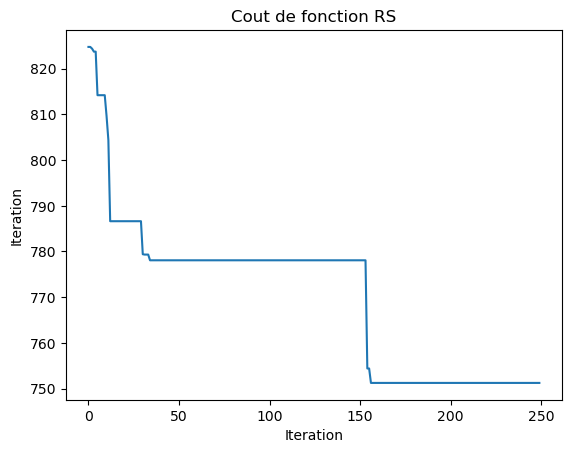

In [37]:
plt.plot(history[:250])
plt.xlabel('Iteration')
plt.ylabel('Iteration')
plt.title('Cout de fonction RS')
plt.savefig('Cout de fonction RS')